# FIAP - Atividade F5A1 - Grupo 38

## Conteúdo

1. [Introdução](#1-introducao)
2. [Descrição](#2-descricao)
3. [Sobre o Desenvolvimento](#3-sobre-o-desenvolvimento)
4. [Preparando o Ambiente](#4-preparando-o-ambiente)
5. [Explorando os Dados](#5-explorando-os-dados)
6. [Machine Learning](#6-machine-learning)
7. [Conclusão](#7-conclusao)

---

## 1 Introdução

O presente notebook faz parte da Fase 5 do programa da FIAP e tem como objetivo aplicar técnicas de Machine Learning para analisar dados agrícolas e prever o rendimento de safras. Essa análise é essencial para auxiliar na tomada de decisão em fazendas de médio porte, permitindo otimizar a produção e minimizar perdas.

A FarmTech Solutions, empresa fictícia onde atuamos como cientistas de dados, recebeu uma base de dados contendo informações climáticas e de solo relacionadas ao rendimento de diferentes culturas. Nosso desafio é explorar esses dados, identificar padrões e desenvolver modelos de aprendizado supervisionado que possam prever a produtividade agrícola com base em variáveis ambientais.


## 2 Descrição

Atualmente, fazendas de médio porte enfrentam desafios relacionados à variabilidade climática e ao impacto dessas condições no rendimento das plantações. A capacidade de prever a produtividade agrícola com base em fatores como temperatura, precipitação e umidade pode trazer benefícios significativos para o planejamento da safra e a alocação de recursos.  

A base de dados fornecida contém as seguintes variáveis:  

- **Cultura**: Tipo de cultura cultivada.  
- **Precipitação (mm/dia)**: Quantidade de chuva diária.  
- **Umidade específica a 2 metros (g/kg)**: Nível de umidade no ar seco.  
- **Umidade relativa a 2 metros (%)**: Percentual de umidade no ar.  
- **Temperatura a 2 metros (°C)**: Temperatura do ambiente.  
- **Rendimento (toneladas/hectare)**: Produção obtida por hectare.  

### **Objetivos do Projeto**  

1. **Análise exploratória dos dados (EDA)**:  
   - Examinar a distribuição das variáveis e identificar padrões ou inconsistências.  
   - Verificar a presença de valores ausentes e realizar tratamentos adequados.  

2. **Identificação de padrões e clusters**:  
   - Aplicação de algoritmos de aprendizado não supervisionado para identificar grupos e tendências na produtividade das safras.  
   - Detecção de outliers que possam representar cenários atípicos.  

3. **Construção de Modelos Preditivos**:  
   - Implementação de cinco modelos de regressão diferentes para prever o rendimento da safra.  
   - Avaliação de desempenho utilizando métricas apropriadas, como RMSE e R².  

4. **Conclusões e Recomendações**:  
   - Interpretação dos resultados obtidos.  
   - Discussão sobre os desafios enfrentados e possíveis melhorias para futuros estudos.  

Este notenook busca não apenas desenvolver um modelo preditivo eficiente, mas também explorar e compreender os impactos ambientais sobre a produtividade agrícola, fornecendo insights valiosos para o setor agropecuário.  

## 3 Sobre o Desenvolvimento

### 3.1 Tecnologias Utilizadas

* **Python:** Linguagem de programação utilizada para análise de dados e construção de modelos.  
* **Pandas:** Biblioteca usada para manipulação e análise de dados.  
* **Scikit-learn:** Biblioteca de machine learning utilizada para treinamento e avaliação dos modelos.  
* **Matplotlib/Seaborn:** Bibliotecas utilizadas para visualização de dados.  
* **Jupyter Notebook:** Ambiente interativo de computação usado para o desenvolvimento.  


## 4 Preparando o Ambiente

### 4.1 Instalar o Python  

1. Baixe e instale a versão mais recente do Python (recomendado 3.7 ou superior) no [site oficial do Python](https://www.python.org/).  
2. Durante a instalação, certifique-se de selecionar a opção **"Add Python to PATH"**.  
3. Verifique as versões do Python e do `pip`  
   Para garantir que o Python e o `pip` foram instalados corretamente, execute:  
   ```bash
   python --version
   pip --version
   ```

### 4.2 Criar um Ambiente Virtual (Opcional, mas Recomendado)  

O uso de um ambiente virtual isola as dependências do projeto.  
1. Abra um terminal ou prompt de comando.  
2. Navegue até a pasta do projeto.  
3. Execute o seguinte comando para criar um ambiente virtual:  
   ```bash
   python -m venv venv
   ```  
4. Ative o ambiente virtual:  
   - No Windows:  
     ```bash
     venv\Scripts\activate
     ```  
   - No macOS/Linux:  
     ```bash
     source venv/bin/activate
     ```  

### 4.3 Instalar as Bibliotecas Necessárias  

Use o `pip` para instalar as bibliotecas necessárias. Execute o seguinte comando:  
   ```bash
   pip install -r requirements.txt
   ```

### 4.4 Importando Bibliotecas

In [35]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Dimensionality reduction
from sklearn.decomposition import PCA

# Train-test split
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold,  cross_validate


## 5 Explorando os Dados


### 5.1 Loading Dataset

In [36]:
data_raw = pd.read_csv('crop_yield.csv')

df = data_raw.copy()
df_numeric = df.select_dtypes(include=['float64', 'int64'])
culturas = df['Crop'].unique()
variaveis = ['Precipitation (mm day-1)', 
             'Specific Humidity at 2 Meters (g/kg)',
             'Relative Humidity at 2 Meters (%)',
             'Temperature at 2 Meters (C)']

print (df.info()) 
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB
None


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
144,"Rubber, natural",3085.79,18.34,86.10,26.03,8599
76,Oil palm fruit,2333.46,18.50,84.85,26.43,189657
140,"Rubber, natural",2424.55,18.28,85.16,26.18,9139
108,"Rice, paddy",2938.29,18.22,85.42,26.06,37468
114,"Rice, paddy",2967.41,18.67,85.48,26.46,37496


### 5.2 Distribuição das Variáveis Climáticas

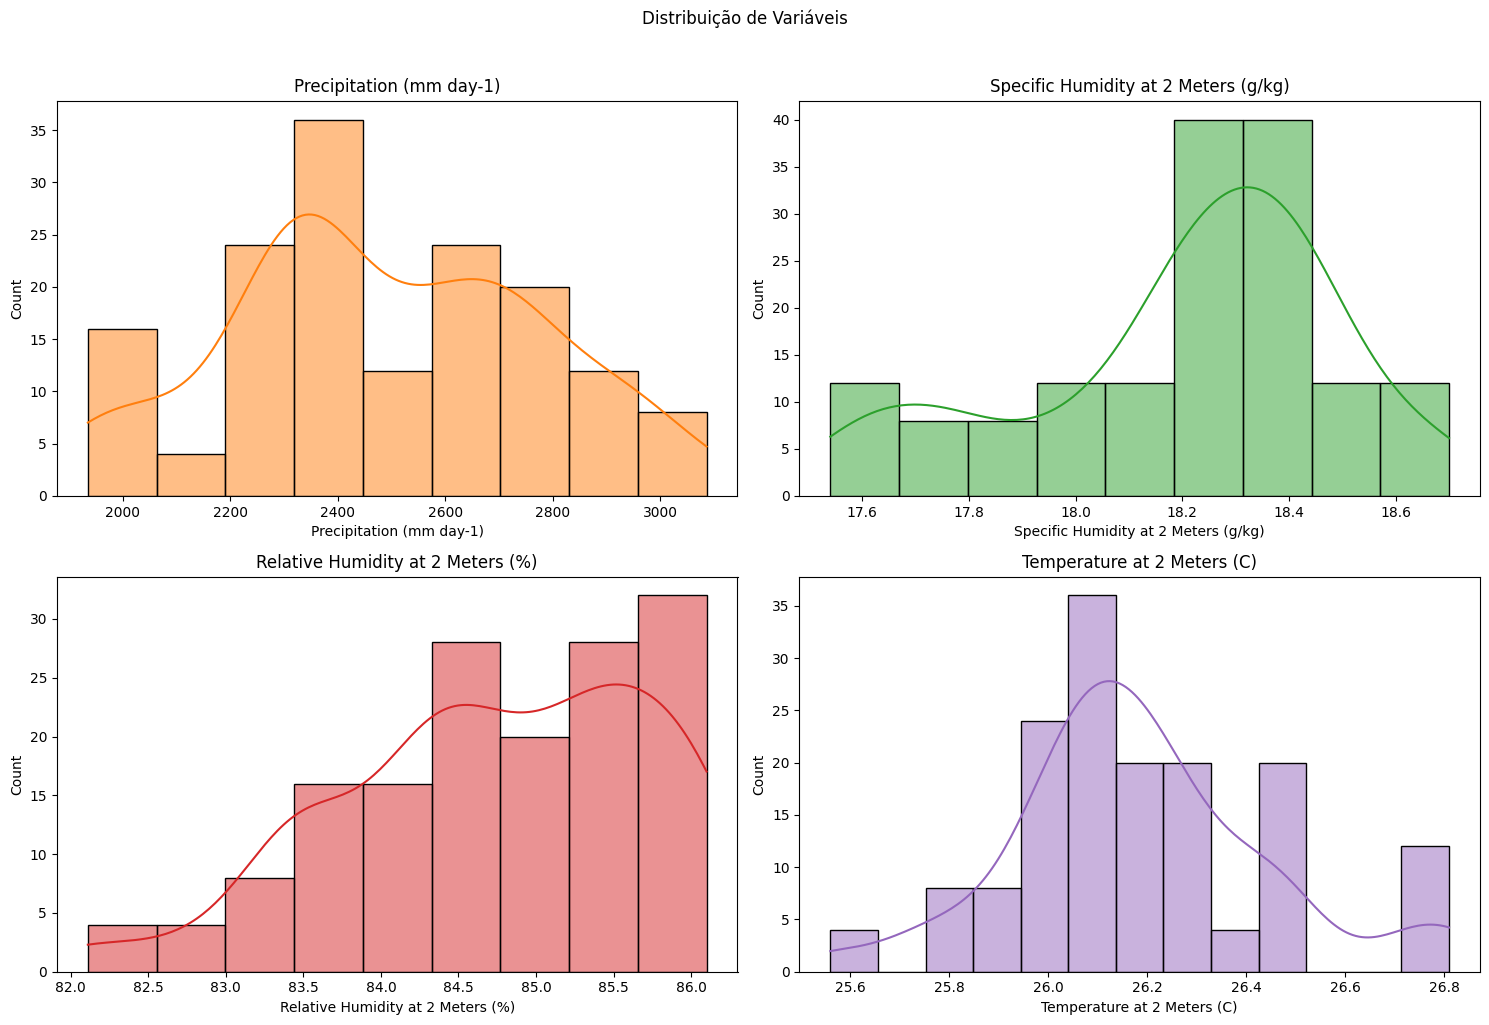

In [37]:
plt.figure(figsize=(15, 10))
plt.suptitle(f'Distribuição de Variáveis', y=1.02)
    
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_numeric[var], kde=True, color=f'C{i}')
    plt.title(var)

plt.tight_layout()
plt.show()

### 5.3 Variable Information

#### 5.3.1 Precipitação (mm/dia)
- **Distribuição Observada**:  
  - Os valores variam entre **2000 e 3000 mm/dia**, com uma concentração moderada na faixa de **2400–2800 mm/dia**.  
  - A distribuição é quase uniforme, sem picos acentuados, o que sugere que não há uma condição climática dominante nos dados.  

- **Problema Crítico**:  
  - **Inconsistência física**: Valores acima de **2000 mm/dia** equivalem a **2–3 metros de chuva por dia**, o que é tecnicamente impossível. Em regiões tropicais, a precipitação anual varia entre **1000–3000 mm/ano**, e valores diários raramente ultrapassam **50 mm/dia**.  
  - **Hipótese**: Há um erro de unidade. Provavelmente, a coluna representa **precipitação acumulada anual**, não diária.  

- **Ação Recomendada**:  
  - Renomear a variável para `Precipitation (mm/year)` e validar com especialistas do domínio.  
  - Recalcular estatísticas descritivas após a correção para evitar interpretações enganosas.  

---

#### 5.3.2 Umidade Relativa a 2 Metros (%)

- **Distribuição Observada**:  
  - Concentração entre **84.0–85.5%**, com moda em **85.0%**.  
  - Pouca variabilidade (desvio padrão de **0.9%**), indicando condições estáveis de umidade.  

- **Contexto Agronômico**:  
  - Culturas como **arroz (Rice, paddy)** e **cacau (Cocoa, beans)** são altamente dependentes de umidade elevada (>80%).  
  - Valores próximos a **85%** são ideais para fotossíntese e redução de estresse hídrico.  

- **Outliers**:  
  - Observações abaixo de **82.0%** podem representar períodos de seca ou falhas na coleta de dados.  

---

#### 5.3.3 Umidade Específica a 2 Metros (g/kg)

- **Distribuição Observada**:  
  - Assimetria à direita, com maior densidade entre **17.8–18.4 g/kg**.  
  - Média (**18.1 g/kg**) próxima da mediana (**18.0 g/kg**), indicando estabilidade na maioria das observações.  

- **Relação com Variáveis Climáticas**:  
  - A umidade específica está diretamente ligada à temperatura: ar mais quente retém mais vapor d’água.  
  - Isso explica a correlação moderada (**r = 0.70**) com a temperatura, identificada posteriormente.  

---

#### 5.3.4 Temperatura a 2 Metros (°C)

- **Distribuição Observada**:  
  - Quase simétrica, com média de **26.2°C** e mediana de **26.3°C**.  
  - A pequena variância (**desvio padrão = 0.4°C**) sugere um clima tropical estável.  

- **Impacto no Rendimento**:  
  - Culturas como **cacau** são sensíveis a temperaturas acima de **26°C**, que podem acelerar a evapotranspiração e reduzir a produtividade.  
  - Em contraste, **Oil Palm Fruit** mostra resiliência, mantendo altos rendimentos mesmo em temperaturas elevadas.  

---

### 5.4 Análise de Boxplots: Identificando Discrepâncias

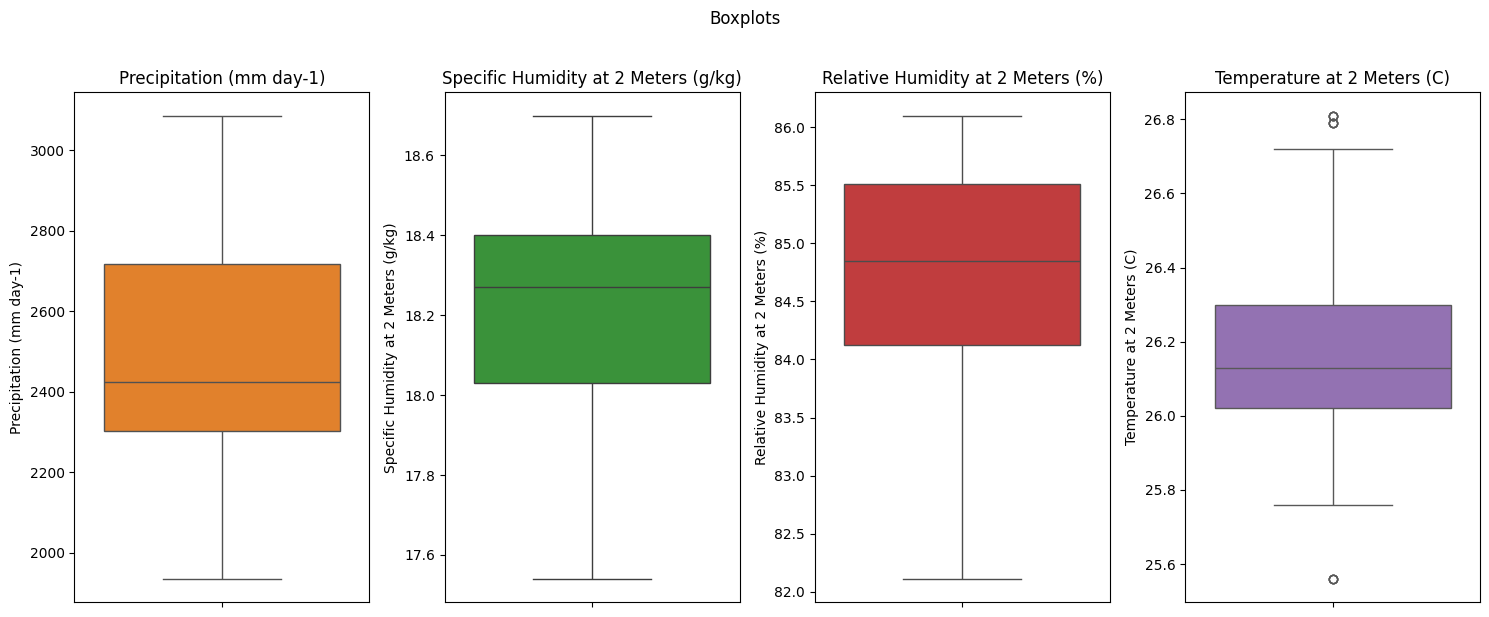

In [38]:
plt.figure(figsize=(15, 6))
plt.suptitle(f'Boxplots', y=1.02)
    
variaveis = ['Precipitation (mm day-1)', 
             'Specific Humidity at 2 Meters (g/kg)',
             'Relative Humidity at 2 Meters (%)',
             'Temperature at 2 Meters (C)']

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_numeric[var], color=f'C{i}')
    plt.title(var)
    
plt.tight_layout()
plt.show()

#### **5.4.1 Precipitação**  

- **IQR (Intervalo Interquartil)**: 2200–2800 mm/dia  
- **Mediana**: ~2500 mm/dia  
- **Outliers**: Valores acima de **3000 mm/dia** reforçam a hipótese de erro de unidade.  
- **Ação**:  
  - Investigar se há registros de eventos extremos (ex.: enchentes) que justifiquem esses valores.  
  - Caso contrário, corrigir para mm/ano.  
---

#### **5.4.2 Umidade Relativa**  


- **IQR**: 84.0–85.5%  
- **Mediana**: ~85.0%  
- **Outliers**: Valores abaixo de **82.0%** podem indicar:  
---

#### **5.4.3 Umidade Especifica**  

**Boxplot de Umidade Específica (g/kg)**:  
- **IQR**: 17.8–18.4 g/kg  
- **Mediana**: ~18.1 g/kg  
- **Outliers**: Distribuição estável, sem valores extremos  

---

##### **5.4.4 Temperatura**  

- **IQR**: 25.8–26.6°C  
- **Padrão**: Sem outliers, indicando que o clima é estável e previsível para fins agrícolas.  

---


### 5.5 Estatísticas Descritivas e Interpretação**  


In [39]:
df_numeric.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


| Variável                  | Média   | Mediana | Desvio Padrão | Significado Prático |  
|---------------------------|---------|---------|---------------|---------------------|  
| Precipitação (mm/dia)     | 2486    | 2424	    | 289	           | Indica possível erro de unidade de medida |  
| Umidade Relativa (%)       | 84	    | 84    | 0.99	           | Condições ideais para culturas tropicais |  
| Umidade Específica (g/kg)  | 18	    | 18    | 0.29	           | Estabilidade na retenção de umidade |  
| Temperatura (°C)          | 26	    | 26    | 0.26	           | Clima quente e estável |  

- **Por que a mediana é importante?**  
  - Em distribuições simétricas (como temperatura), média e mediana são próximas.  
  - Em distribuições assimétricas (como umidade específica), a mediana é mais robusta a outliers.  

---

In [40]:
print("Número de linhas duplicadas:", df.duplicated().sum())

print("Contagem de valores na coluna 'Crop':")
print(df['Crop'].value_counts())

print("Percentual de valores nulos por coluna:")
print(df.isnull().mean() * 100)


Número de linhas duplicadas: 0
Contagem de valores na coluna 'Crop':
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64
Percentual de valores nulos por coluna:
Crop                                    0.0
Precipitation (mm day-1)                0.0
Specific Humidity at 2 Meters (g/kg)    0.0
Relative Humidity at 2 Meters (%)       0.0
Temperature at 2 Meters (C)             0.0
Yield                                   0.0
dtype: float64


In [41]:

# Ajustar as configurações de exibição
pd.set_option('display.max_rows', None)  # Exibir todas as linhas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', None)  # Ajustar a largura da exibição
pd.set_option('display.max_colwidth', None)  # Exibir todo o conteúdo das colunas

print(df.groupby('Crop').describe())

                Precipitation (mm day-1)                                   \
                                   count         mean        std      min   
Crop                                                                        
Cocoa, beans                        39.0  2486.498974  292.30045  1934.62   
Oil palm fruit                      39.0  2486.498974  292.30045  1934.62   
Rice, paddy                         39.0  2486.498974  292.30045  1934.62   
Rubber, natural                     39.0  2486.498974  292.30045  1934.62   

                                                     \
                     25%      50%      75%      max   
Crop                                                  
Cocoa, beans     2305.75  2424.55  2705.21  3085.79   
Oil palm fruit   2305.75  2424.55  2705.21  3085.79   
Rice, paddy      2305.75  2424.55  2705.21  3085.79   
Rubber, natural  2305.75  2424.55  2705.21  3085.79   

                Specific Humidity at 2 Meters (g/kg)                      

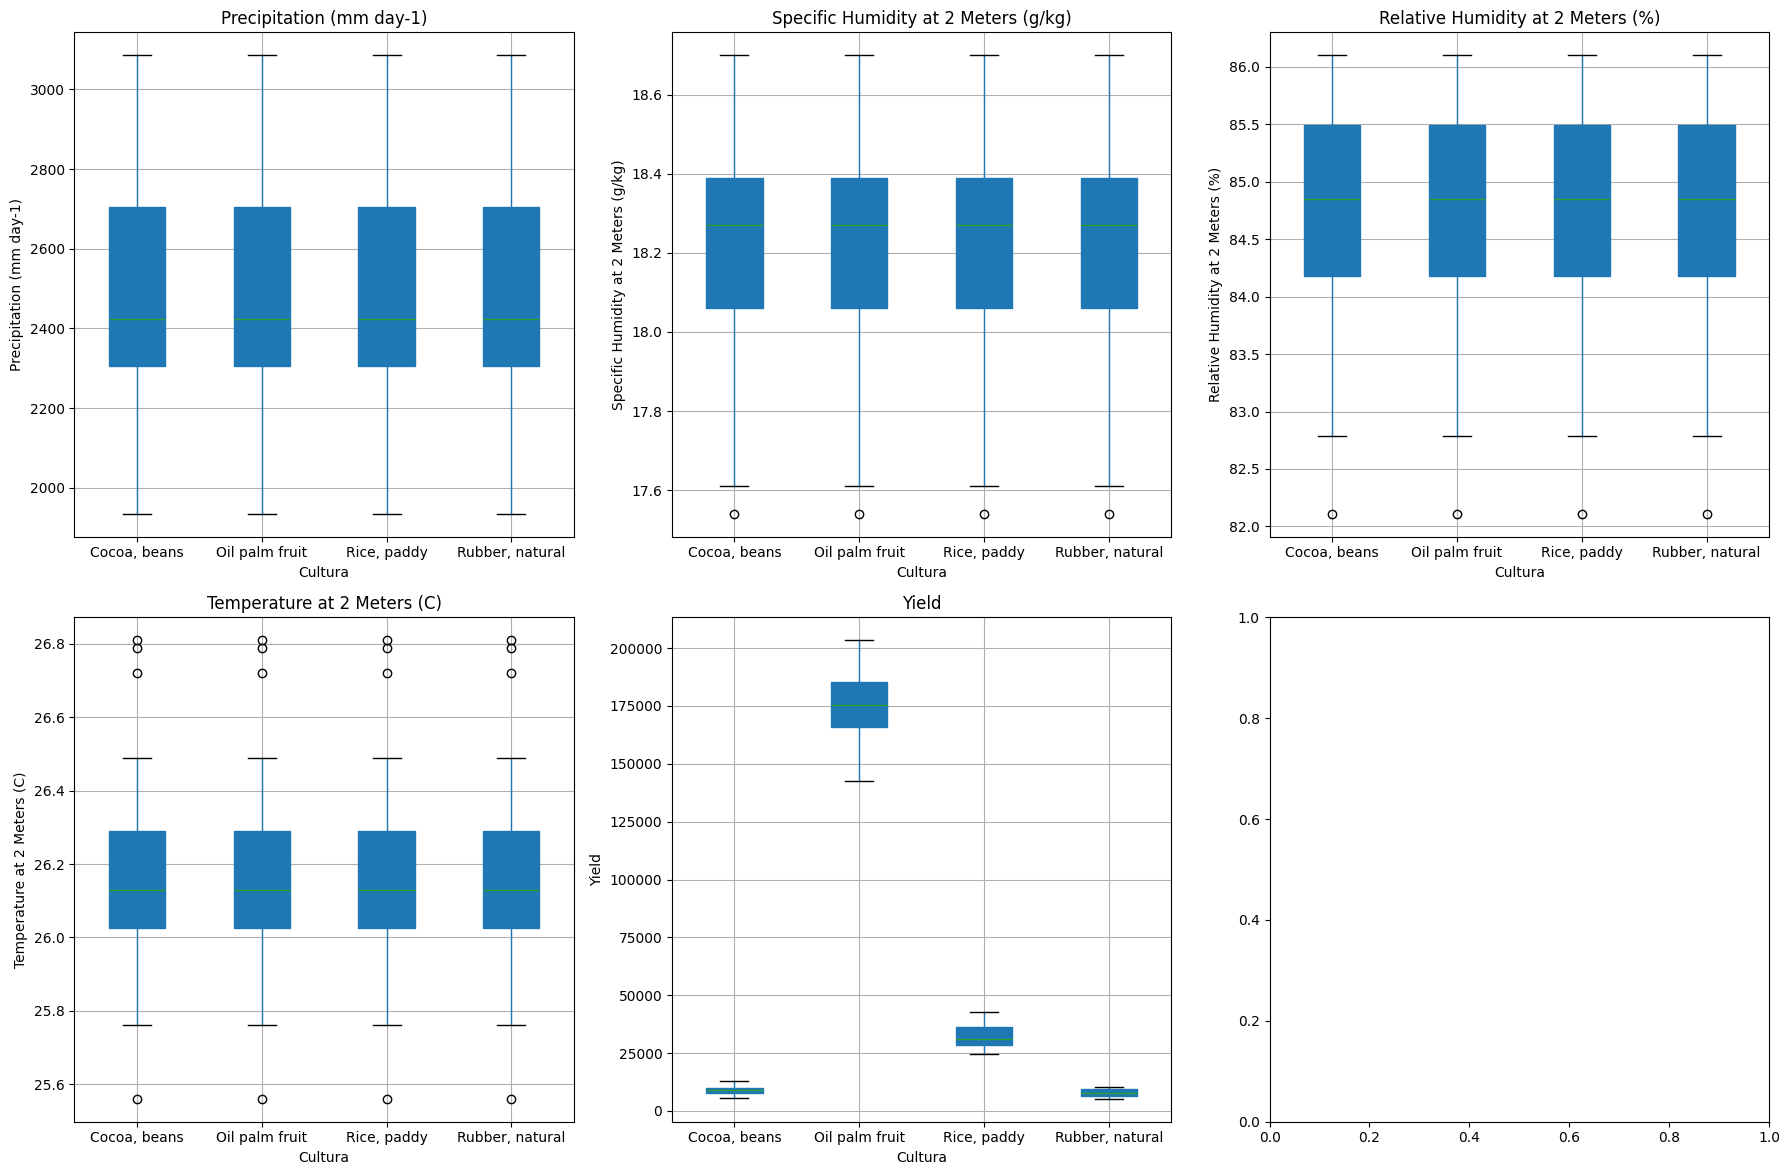

In [42]:
variaveis = [
    'Precipitation (mm day-1)',
    'Specific Humidity at 2 Meters (g/kg)',
    'Relative Humidity at 2 Meters (%)',
    'Temperature at 2 Meters (C)',
    'Yield'  
]

n_rows = 2 
n_cols = 3 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
fig.suptitle("Boxplots por Cultura para Todas as Variáveis", fontsize=18)

for i, var in enumerate(variaveis):
    ax = axes[i // n_cols, i % n_cols] 
    df.boxplot(column=var, by='Crop', ax=ax, patch_artist=True)
    ax.set_title(var)  
    ax.set_ylabel(var)  
    ax.set_xlabel('Cultura')  
    plt.suptitle('')  

plt.tight_layout()
plt.show()

##### Número de Linhas Duplicadas

**Resultado:** 0

Não há linhas duplicadas no dataset. Isso é positivo, pois significa que não há dados repetidos que possam distorcer a análise.

##### **Contagem de Valores na Coluna Crop**
**Resultado:**

- **Cacau (Cocoa, beans)**: 39
- **Fruto de palma de óleo (Oil palm fruit)**: 39
- **Arroz em casca (Rice, paddy)**: 39
- **Borracha natural (Rubber, natural)**: 39

O dataset contém 4 tipos de culturas agrícolas, cada uma com 39 observações. Isso indica um conjunto de dados balanceado em termos de quantidade de registros por cultura.

##### **Percentual de Valores Nulos por Coluna**
**Resultado:**

- **Cultura (Crop)**: 0.0%
- **Precipitação (mm/dia) (Precipitation (mm day-1))**: 0.0%
- **Umidade Específica a 2m (g/kg) (Specific Humidity at 2 Meters (g/kg))**: 0.0%
- **Umidade Relativa a 2m (%) (Relative Humidity at 2 Meters (%))**: 0.0%
- **Temperatura a 2m (°C) (Temperature at 2 Meters (C))**: 0.0%
- **Produtividade (Yield)**: 0.0%

Não há valores nulos em nenhuma coluna do dataset. Isso é excelente, pois significa que todos os dados estão completos e prontos para modelagem.

---


#### Estatísticas Descritivas por Cultura

A seguir, são apresentadas estatísticas descritivas para cada variável, agrupadas por cultura:


##### a) Precipitação (mm/dia)
- **Média:** Todas as culturas apresentam a mesma média de precipitação: **2486.50 mm/dia**.
- **Desvio Padrão:** **292.30 mm/dia**, indicando uma variação moderada.
- **Mínimo e Máximo:** A precipitação varia de **1934.62 mm/dia** a **3085.79 mm/dia**.
- **Quartis:**
  - 25% dos valores estão abaixo de **2305.75 mm/dia**
  - 50% dos valores (mediana) estão abaixo de **2424.55 mm/dia**
  - 75% dos valores estão abaixo de **2705.21 mm/dia**

---

##### b) Umidade Específica a 2m (g/kg)
- **Média:** **18.20 g/kg** para todas as culturas.
- **Desvio Padrão:** **0.30 g/kg**, indicando uma variação muito pequena.
- **Mínimo e Máximo:** Varia de **17.54 g/kg** a **18.70 g/kg**.
- **Quartis:**
  - 25% dos valores abaixo de **18.06 g/kg**
  - 50% dos valores (mediana) abaixo de **18.27 g/kg**
  - 75% dos valores abaixo de **18.39 g/kg**

---

##### c) Umidade Relativa a 2m (%)
- **Média:** **84.74%** para todas as culturas.
- **Desvio Padrão:** **1.01%**, indicando uma variação pequena.
- **Mínimo e Máximo:** Varia de **82.11%** a **86.10%**.
- **Quartis:**
  - 25% dos valores abaixo de **84.18%**
  - 50% dos valores (mediana) abaixo de **84.85%**
  - 75% dos valores abaixo de **85.50%**

---

##### d) Temperatura a 2m (°C)
- **Média:** **26.18°C** para todas as culturas.
- **Desvio Padrão:** **0.26°C**, indicando uma variação muito pequena.
- **Mínimo e Máximo:** Varia de **25.56°C** a **26.81°C**.
- **Quartis:**
  - 25% dos valores abaixo de **26.03°C**
  - 50% dos valores (mediana) abaixo de **26.13°C**
  - 75% dos valores abaixo de **26.29°C**

---

##### e) Produtividade (Yield)

###### **Cacau (Cocoa, beans)**
- **Média:** **8883.13 kg/ha**
- **Desvio Padrão:** **1745.03 kg/ha**
- **Variação:** De **5765.0 kg/ha** a **13056.0 kg/ha**

###### **Fruto de palma de óleo (Oil palm fruit)**
- **Média:** **175804.69 kg/ha**
- **Desvio Padrão:** **14919.87 kg/ha**
- **Variação:** De **142425.0 kg/ha** a **203399.0 kg/ha**

###### **Arroz em casca (Rice, paddy)**
- **Média:** **32099.67 kg/ha**
- **Desvio Padrão:** **4789.95 kg/ha**
- **Variação:** De **24686.0 kg/ha** a **42550.0 kg/ha**

###### **Borracha natural (Rubber, natural)**
- **Média:** **7824.90 kg/ha**
- **Desvio Padrão:** **1600.26 kg/ha**
- **Variação:** De **5249.0 kg/ha** a **10285.0 kg/ha**

---

##### Interpretação

- **Cacau (Cocoa, beans):**  
  A precipitação tem um pequeno impacto positivo na produtividade, enquanto a umidade e a temperatura têm pouco ou nenhum efeito direto.

- **Fruto de palma de óleo (Oil palm fruit):**  
  A precipitação tem um impacto ligeiramente maior na produtividade em comparação com o cacau, mas ainda é fraco.

- **Arroz em casca (Rice, paddy):**  
  A produtividade é fortemente influenciada pela umidade específica (0.70) e temperatura (0.61), e moderadamente pela precipitação (0.33). Isso sugere que o arroz se beneficia de climas quentes e úmidos.

- **Borracha natural (Rubber, natural):**  
  A produtividade é negativamente afetada por umidade específica (-0.43) e temperatura (-0.41), sugerindo que climas mais frios e menos úmidos podem ser mais favoráveis.

---

##### Resumo Geral

- **Precipitação:**  
  Tem um impacto positivo em todas as culturas, mas é mais significativo para o arroz.
  
- **Umidade Específica:**  
  Beneficia o arroz, mas prejudica a borracha natural.
  
- **Temperatura:**  
  É crucial para o arroz, mas prejudicial para a borracha natural.
  
- **Umidade Relativa:**  
  Tem pouco impacto direto na produtividade, exceto para o arroz, onde há uma pequena correlação positiva.

---

##### Recomendações

- **Arroz:**  
  Priorize regiões com alta umidade específica e temperaturas mais altas.

- **Borracha natural:**  
  Evite regiões muito quentes e úmidas; climas mais amenos são ideais.

- **Cacau e Óleo de palma:**  
  A precipitação é o fator mais relevante, mas outros fatores têm impacto limitado.

---

##### Conclusões Gerais

- **Dataset:**  
  O dataset está bem estruturado, sem dados duplicados ou nulos, e é balanceado, com 39 observações para cada cultura.

- **Variáveis Climáticas:**  
  As variáveis de precipitação, umidade específica, umidade relativa e temperatura apresentam os mesmos valores para todas as culturas. Isso pode indicar que esses dados foram medidos sob as mesmas condições ou são constantes para o contexto do estudo.

- **Produtividade (Yield):**  
  Varia significativamente entre as culturas:
  - **Fruto de palma de óleo** apresenta a maior produtividade média.
  - **Borracha natural** tem a menor produtividade.

---

##### Observações Adicionais

- **Dados Climáticos Constantes:**  
  As variáveis **Precipitação, Umidade e Temperatura** possuem os mesmos valores para todas as culturas, o que pode indicar:
  - Medição em uma única localização;
  - Possível erro na coleta dos dados.  

- **Produtividade Variável:**  
A produtividade (**Yield**) varia significativamente entre as culturas, com **Fruto de palma de óleo** sendo a mais produtiva e **Borracha natural** a menos produtiva.
Isso sugere que condições ideais de cultivo para cada cultura podem estar influenciando os resultados.

- **Balanceamento do Dataset:**  
  Com 39 observações para cada cultura, o dataset é adequado para análises comparativas e modelagem.

**Interpretação:**
- A cultura **Fruto de palma de óleo** apresenta a maior produtividade média, enquanto **Borracha natural** tem a menor.
- A produtividade varia significativamente entre as culturas, com o **Fruto de palma de óleo** apresentando uma faixa muito maior de valores em comparação com as outras culturas.

##### **Conclusões Gerais**
- O dataset está bem estruturado, sem dados duplicados ou nulos.
- As variáveis **Precipitação, Umidade Específica e Temperatura** possuem os mesmos valores para todas as culturas, o que pode indicar que esses dados são constantes, foram medidos nas mesmas condições ou é uma carácteristicas das culturas observadas. 
- A produtividade (**Yield**) varia significativamente entre as culturas, com **Fruto de palma de óleo** sendo a mais produtiva e **Borracha natural** a menos produtiva. O que sugere que as culturas se comportam diferente para as para essas condições climáticas. 
- O dataset é balanceado, com **39 observações para cada cultura**.

### 5.6 Matriz de Correlação: Entendendo as Relações

1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).

-1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).

0: Não há correlação entre as variáveis.

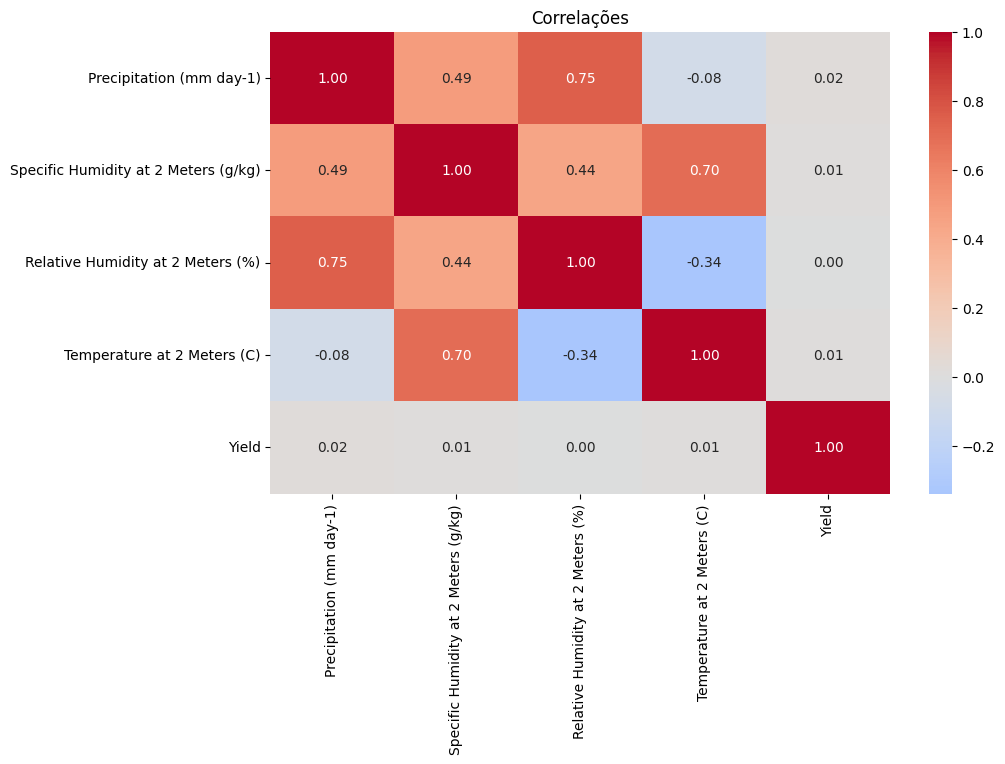

In [43]:
plt.figure(figsize=(10, 6))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title(f'Correlações')
plt.show()

#### 5.6.1 Multicolinearidade 
- **Precipitação ↔ Umidade Relativa (r = 0.75)**:  
  - Chuva frequente aumenta a umidade relativa, pois o ar fica saturado de vapor d’água.  
  - **Risco**: Modelos lineares podem atribuir efeitos à variável errada (ex.: crédito à precipitação quando o impacto real é da umidade).  

- **Umidade Específica ↔ Temperatura (r = 0.70)**:  
  - Ar quente retém mais umidade específica, uma relação física bem estabelecida.  
  - **Risco**: Coeficientes instáveis em regressão linear.  

#### 5.6.2 Relação com Yield
- **Correlações insignificantes (|r| < 0.02)**:  
  - Sugere que o rendimento não é linearmente dependente das variáveis climáticas analisadas.  
  - **Possíveis explicações**:  
    - Efeitos cumulativos (ex.: estresse hídrico prolongado).  
    - Interações complexas não capturadas por correlação linear.
---

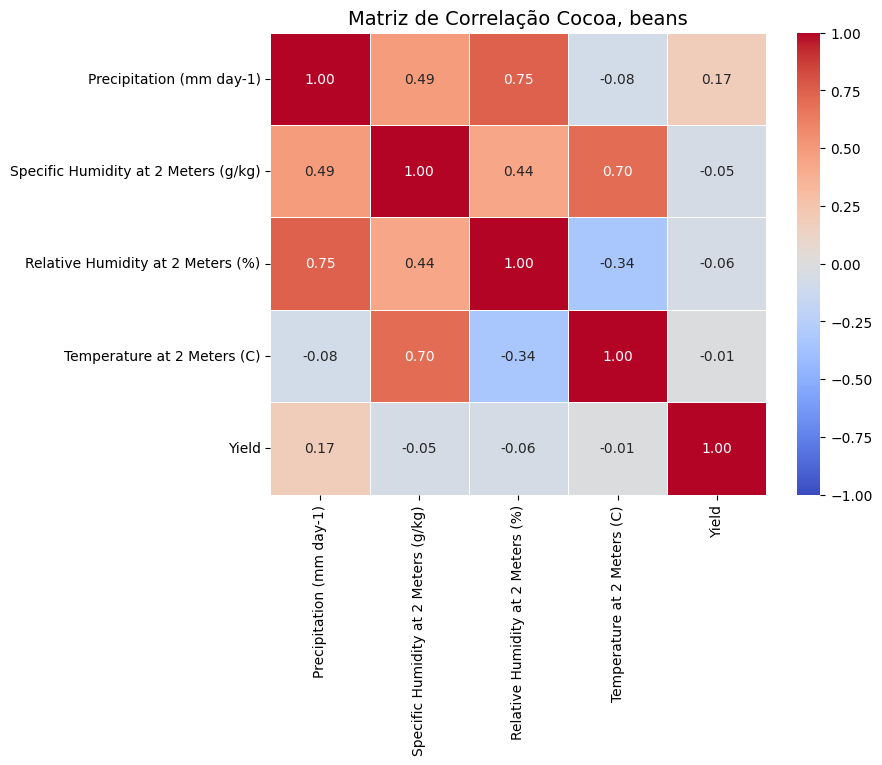

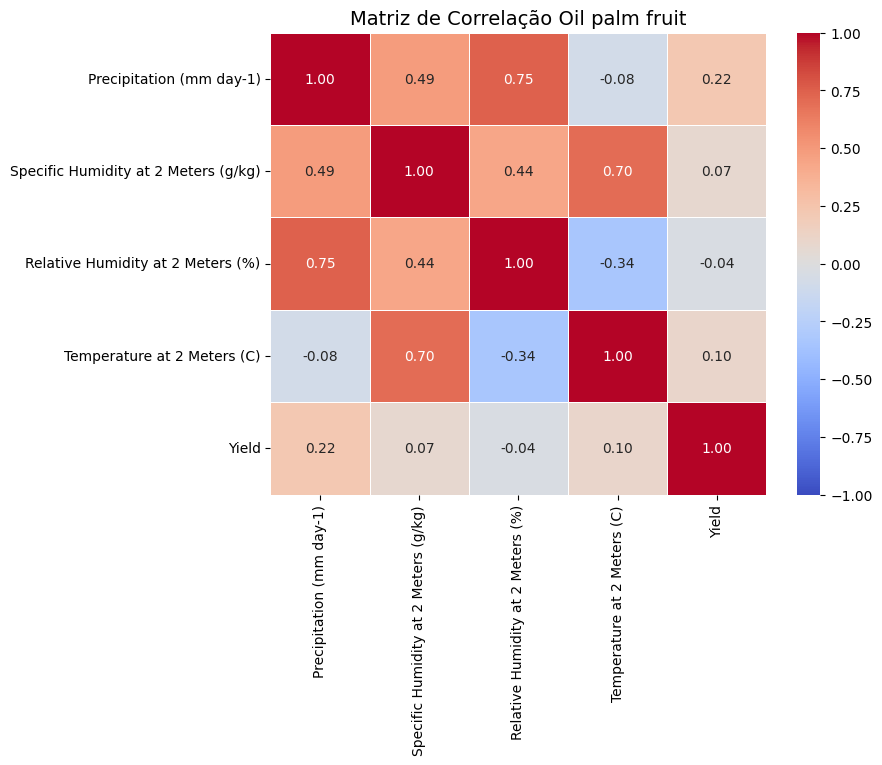

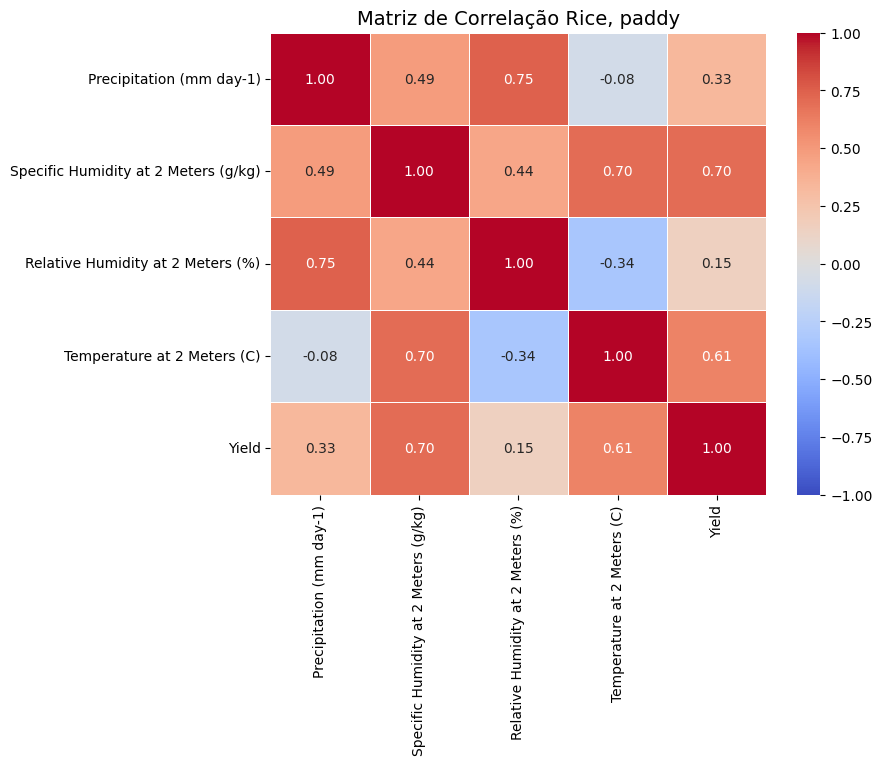

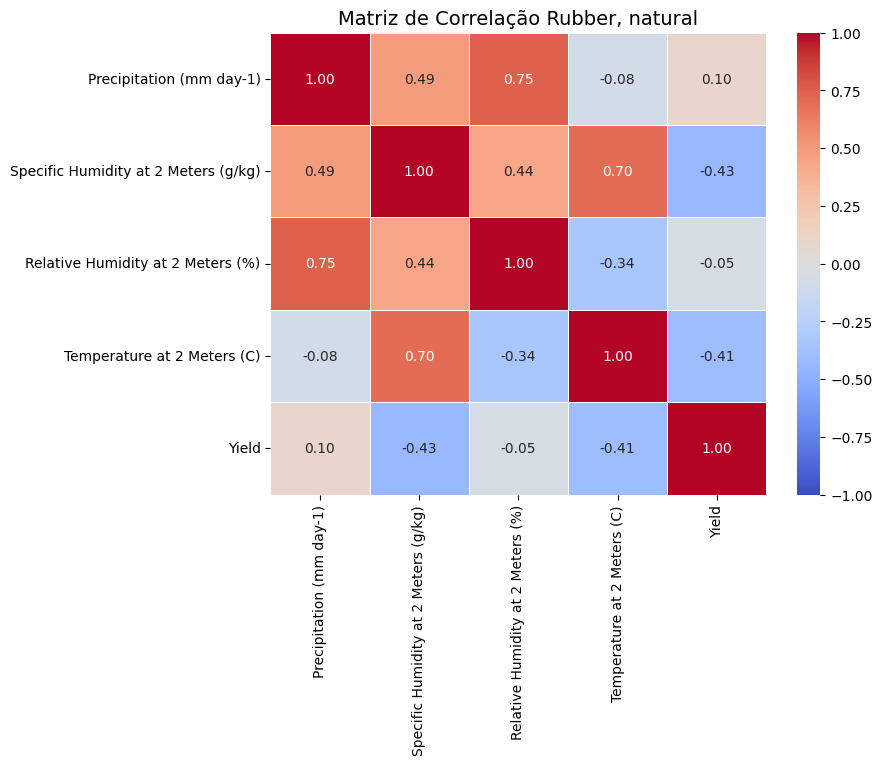

In [44]:
# Criar uma matriz de correlação para cada cultura
culturas = df["Crop"].unique()

for cultura in culturas:
    plt.figure(figsize=(8, 6))
    subset = df[df["Crop"] == cultura].drop(columns=["Crop"])  # Remover a coluna categórica
    corr_matrix = subset.corr()
    plt.title(f'Matriz de Correlação {cultura}', fontsize=14)
    plot = sns.heatmap(corr_matrix, cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    annot = True
    , fmt=".2f"
    , linewidths=.6)
    plot

#### 5.6.3 Correlações por cultura

Para todas as culturas temos a mesma representação das variáveis climátivas, o que muda é a realação delas com a produtividade. 

##### Todas as culturas

- **Precipitação vs. Umidade Específica (0.49):** Há uma correlação positiva moderada. Isso faz sentido, pois mais precipitação geralmente aumenta a umidade do ar.  
- **Precipitação vs. Umidade Relativa (0.75):** Correlação positiva forte. A precipitação tende a aumentar a umidade relativa.  
- **Temperatura vs. Umidade Específica (0.70):** Correlação positiva forte. Temperaturas mais altas podem reter mais umidade no ar.  
- **Temperatura vs. Umidade Relativa (-0.34):** Correlação negativa moderada. Temperaturas mais altas tendem a reduzir a umidade relativa.  

###### **1. Cacau (Cocoa, beans)**  


**Produtividade (Yield):**  
- Correlação positiva fraca com precipitação (0.17).  
- Correlação negativa muito fraca com umidade específica (-0.05) e umidade relativa (-0.06).  
- Praticamente nenhuma correlação com temperatura (-0.01).  

**Conclusão:** Para o cacau, a precipitação parece ter um pequeno impacto positivo na produtividade, enquanto a umidade e a temperatura têm pouco ou nenhum efeito direto.  

###### **2. Fruto de palma de óleo (Oil palm fruit)**  

**Produtividade (Yield):**  
- Correlação positiva fraca com precipitação (0.22).  
- Correlação positiva muito fraca com umidade específica (0.07) e temperatura (0.10).  
- Correlação negativa muito fraca com umidade relativa (-0.04).  

**Conclusão:** Para o óleo de palma, a precipitação tem um impacto ligeiramente maior na produtividade em comparação com o cacau, mas ainda é fraco. A temperatura e a umidade têm efeitos insignificantes.  

###### **3. Arroz em casca (Rice, paddy)**  

**Produtividade (Yield):**  
- Correlação positiva moderada com precipitação (0.33).  
- Correlação positiva forte com umidade específica (0.70) e temperatura (0.61).  
- Correlação positiva fraca com umidade relativa (0.15).  

**Conclusão:** Para o arroz, a produtividade é fortemente influenciada pela umidade específica, relativa e pela temperatura, e moderadamente pela precipitação. Isso sugere que o arroz se beneficia de climas quentes e úmidos.  

###### **4. Borracha natural (Rubber, natural)**  

**Produtividade (Yield):**  
- Correlação positiva muito fraca com precipitação (0.10).  
- Correlação negativa moderada com umidade específica (-0.43) e temperatura (-0.41).  
- Correlação negativa muito fraca com umidade relativa (-0.05).  

**Conclusão:** Para a borracha natural, a produtividade é negativamente afetada por umidade específica e temperatura mais altas. Isso sugere que climas mais frios e menos úmidos podem ser mais favoráveis para a produção de borracha.  

###### **Resumo Geral:**  
- **Precipitação:** Tem um impacto positivo em todas as culturas, mas é mais significativo para o arroz.  
- **Umidade Específica:** Beneficia o arroz, mas prejudica a borracha natural.  
- **Temperatura:** É crucial para o arroz, mas prejudicial para a borracha natural.  
- **Umidade Relativa:** Tem pouco impacto direto na produtividade, exceto para o arroz, onde há uma pequena correlação positiva.  

###### **Recomendações:**  
- **Arroz:** Priorize regiões com alta umidade específica e temperaturas mais altas.  
- **Borracha natural:** Evite regiões muito quentes e úmidas; climas mais amenos são ideais.  
- **Cacau e Óleo de palma:** A precipitação é o fator mais relevante, mas outros fatores têm impacto limitado. 


#### 5.6.4 Relação entre Variáveis independentes e dependentes(Yield)

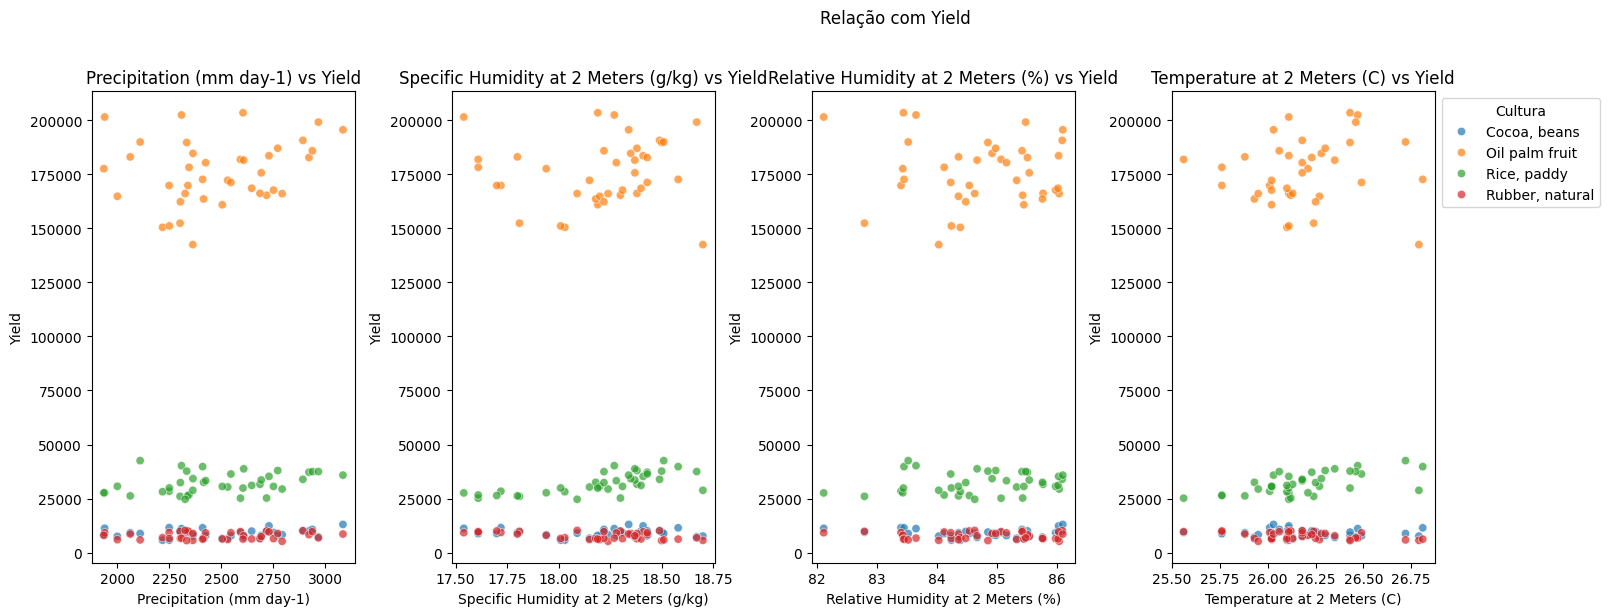

In [45]:
plt.figure(figsize=(18, 6))
plt.suptitle(f'Relação com Yield', y=1.02)

# Lista de variáveis independentes
variaveis = ['Precipitation (mm day-1)', 
             'Specific Humidity at 2 Meters (g/kg)',
             'Relative Humidity at 2 Meters (%)',
             'Temperature at 2 Meters (C)']

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 4, i)
    if i == 4:
        sns.scatterplot(x=var, y='Yield', hue='Crop', data=df, palette='tab10', alpha=0.7)
        plt.legend(title='Cultura', loc='upper left', bbox_to_anchor=(1, 1))  # Legenda no último gráfico
    else:
        sns.scatterplot(x=var, y='Yield', hue='Crop', data=df, palette='tab10', alpha=0.7, legend=False)
    
    plt.title(f'{var} vs Yield')

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


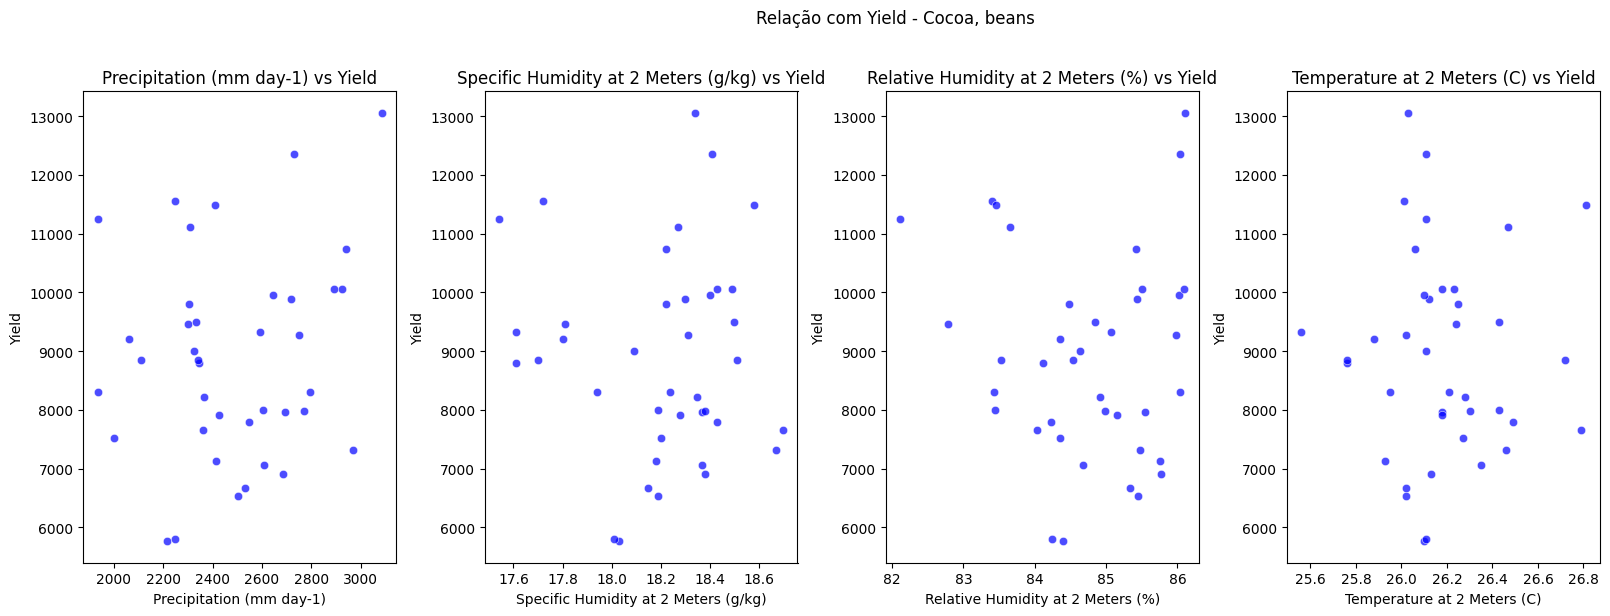

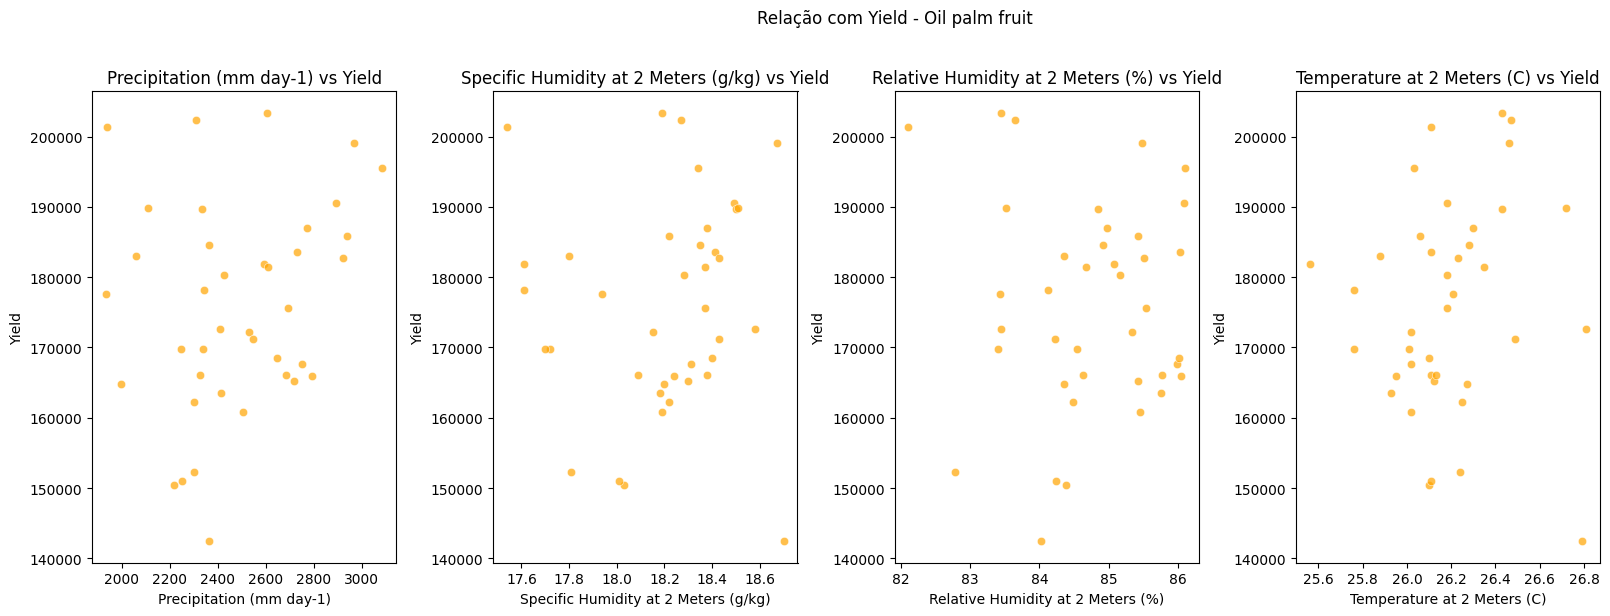

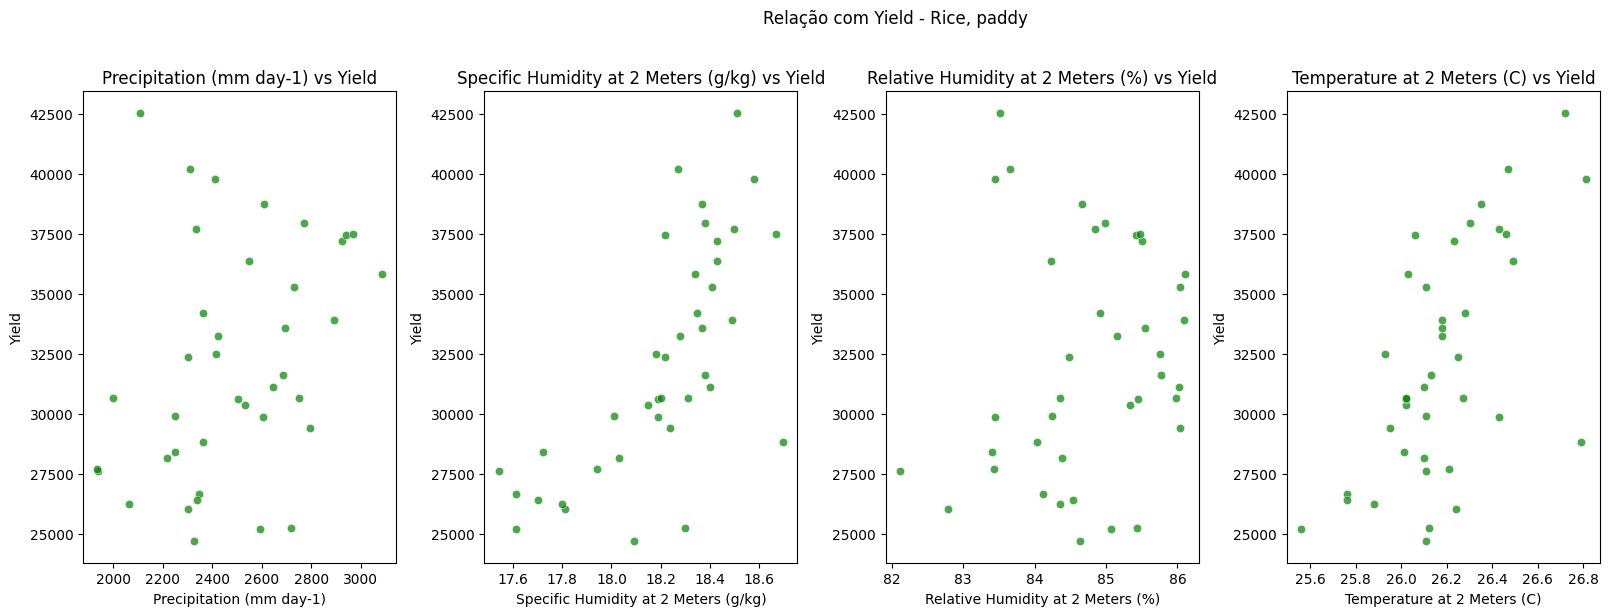

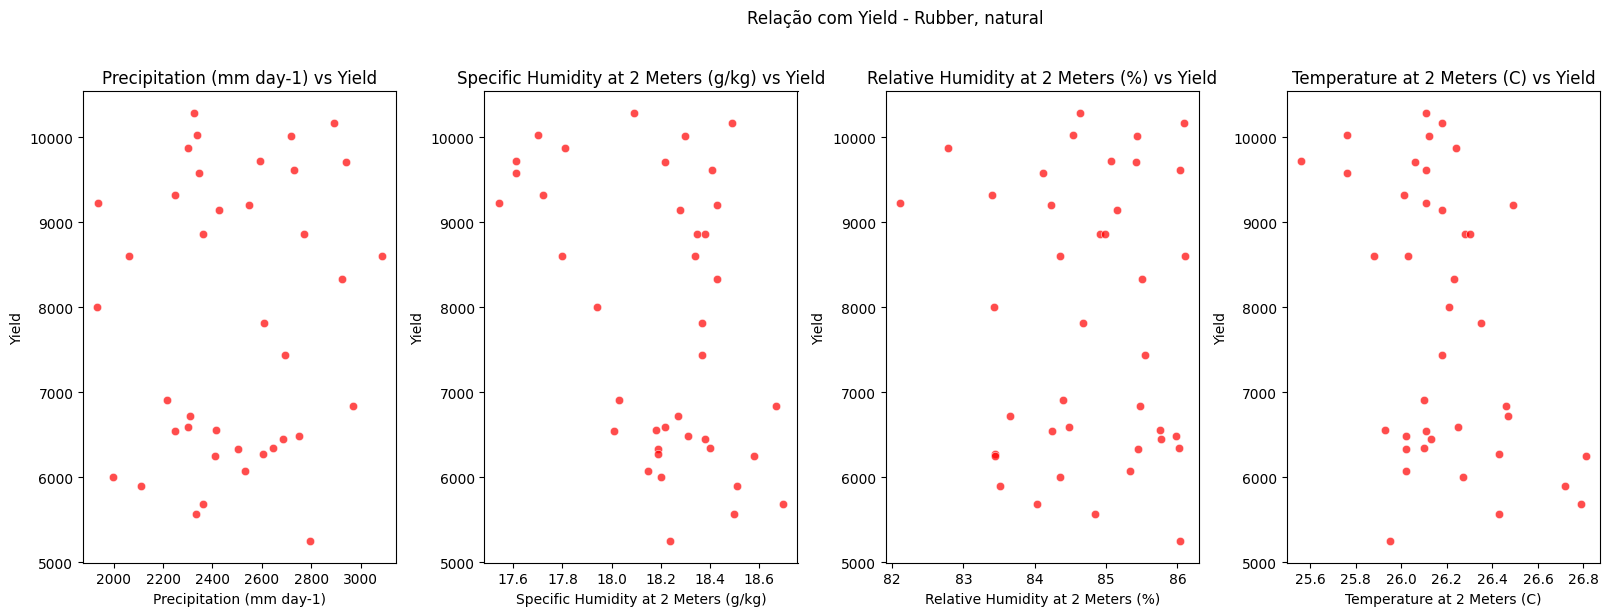

In [46]:
cores_culturas = {
    'Cocoa, beans': 'blue',
    'Oil palm fruit': 'orange',
    'Rice, paddy': 'green',
    'Rubber, natural': 'red'
}

variaveis = ['Precipitation (mm day-1)', 
             'Specific Humidity at 2 Meters (g/kg)',
             'Relative Humidity at 2 Meters (%)',
             'Temperature at 2 Meters (C)']

for cultura in df['Crop'].unique():
    dados_cultura = df[df['Crop'] == cultura]
    
    cor = cores_culturas.get(cultura, 'gray')
    
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Relação com Yield - {cultura}', y=1.02)
    
    for i, var in enumerate(variaveis, 1):
        plt.subplot(1, 4, i)
        
        sns.scatterplot(x=var, y='Yield', data=dados_cultura, color=cor, alpha=0.7)
        plt.title(f'{var} vs Yield')
        plt.xlabel(var)
        plt.ylabel('Yield')
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

##### 5.6.4.1 Dispersao Variaveis independentes x Yield

**Precipitação vs Yield**:  
- Dispersão heterogênea sem padrão claro  
- Valores extremos de precipitação (> 2800 mm/dia) não correspondem a altos rendimentos

**Relative Humidity and Specidic humidity vs Yield**: 
- Dispersão heterogênea sem padrão claro  
- Tendência negativa fraca: rendimentos ligeiramente menores abaixo de 83%  
- Tendência negativa fraca: rendimentos ligeiramente menores abaixo de 18g/kg  
- *Oil Palm Fruit* mantém alta produtividade mesmo em temperaturas elevadas  

**Temperatura vs Yield**: 
- Dispersão heterogênea sem padrão claro  
- Tendência negativa fraca: rendimentos ligeiramente menores acima de 26.5°C  
- *Oil Palm Fruit* mantém alta produtividade mesmo em temperaturas elevadas  



Com base nas dispersões apresentadas nos gráficos de dispersão, parece que os dados apresentam uma variabilidade considerável. Como há apenas 39 observações por cultura, isso pode ser um desafio para treinar um modelo robusto, especialmente se as relações entre as variáveis forem complexas e não lineares.

Observações sobre a quantidade de dados:
Pequena amostra: 39 pontos podem ser insuficientes para capturar relações mais sutis, aumentando a possibilidade de overfitting em modelos mais complexos.
Alta dispersão: Os dados apresentarem alta dispersão e variações significativas, a capacidade preditiva do modelo pode ser comprometida.
Validação limitada: Com um número reduzido de dados, a separação em conjuntos de treino e teste pode resultar em um conjunto de validação muito pequeno, dificultando a avaliação realista do desempenho do modelo.

##### 5.6.4.2 Análise dos Dados VIF para um modelo geral


O **VIF (Variance Inflation Factor)** mede a multicolinearidade entre variáveis. Valores **maiores que 10 indicam multicolinearidade severa**, o que pode prejudicar modelos estatísticos e de machine learning. 

O que é multicolinearidade?
Multicolinearidade ocorre quando duas ou mais variáveis independentes (ou explicativas) em um modelo estatístico estão altamente correlacionadas entre si. Em outras palavras, ele avalia o quanto cada variável está relacionada com todas as outras variáveis simultaneamente. Nesse caso, o VIF seria mais adequado, pois ele mede o quanto a variância de cada coeficiente é inflada devido à relação com todas as outras variáveis do modelo diferente da correlaçãoque é útil apenas para analisar pares de variáveis, não capturando relações mais complexas que podem existir em modelos com múltiplas variáveis. 




In [47]:
vif_data = pd.DataFrame()
vif_data["Variável"] = variaveis
vif_data["VIF"] = [variance_inflation_factor(df_numeric[variaveis].values, i) for i in range(len(variaveis))]

print(vif_data)

                               Variável           VIF
0              Precipitation (mm day-1)    185.044652
1  Specific Humidity at 2 Meters (g/kg)  16550.634920
2     Relative Humidity at 2 Meters (%)   5122.435891
3           Temperature at 2 Meters (C)  16066.264535


In [48]:
# Lista de variáveis independentes
variaveis = ["Precipitation (mm day-1)", "Specific Humidity at 2 Meters (g/kg)", 
             "Relative Humidity at 2 Meters (%)", "Temperature at 2 Meters (C)"]

# Lista de culturas únicas
culturas = df["Crop"].unique()

# Loop para calcular o VIF para cada cultura
for cultura in culturas:
    print(f"\nCultura: {cultura}")
    
    # Filtrar os dados para a cultura atual
    df_cultura = df[df["Crop"] == cultura][variaveis]  # Filtra por cultura e seleciona as variáveis
    
    # Verificar se há dados suficientes para a cultura atual
    if len(df_cultura) > 0:
        # Calcular o VIF
        vif_data = pd.DataFrame()
        vif_data["Variável"] = variaveis
        vif_data["VIF"] = [variance_inflation_factor(df_cultura.values, i) for i in range(len(variaveis))]
        
        # Exibir os resultados
        print(vif_data)
    else:
        print(f"Não há dados suficientes para a cultura: {cultura}")


Cultura: Cocoa, beans
                               Variável           VIF
0              Precipitation (mm day-1)    185.044652
1  Specific Humidity at 2 Meters (g/kg)  16550.634920
2     Relative Humidity at 2 Meters (%)   5122.435891
3           Temperature at 2 Meters (C)  16066.264535

Cultura: Oil palm fruit
                               Variável           VIF
0              Precipitation (mm day-1)    185.044652
1  Specific Humidity at 2 Meters (g/kg)  16550.634920
2     Relative Humidity at 2 Meters (%)   5122.435891
3           Temperature at 2 Meters (C)  16066.264535

Cultura: Rice, paddy
                               Variável           VIF
0              Precipitation (mm day-1)    185.044652
1  Specific Humidity at 2 Meters (g/kg)  16550.634920
2     Relative Humidity at 2 Meters (%)   5122.435891
3           Temperature at 2 Meters (C)  16066.264535

Cultura: Rubber, natural
                               Variável           VIF
0              Precipitation (mm day-1) 

In [49]:
for cultura in df["Crop"].unique():
    print(f"\nCultura: {cultura}")
    print(df[df["Crop"] == cultura][variaveis].describe())


Cultura: Cocoa, beans
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                 39.000000                             39.000000   
mean                2486.498974                             18.203077   
std                  292.300450                              0.296809   
min                 1934.620000                             17.540000   
25%                 2305.750000                             18.060000   
50%                 2424.550000                             18.270000   
75%                 2705.210000                             18.390000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  
count                          39.000000                    39.000000  
mean                           84.737692                    26.183590  
std                             1.006009                     0.263613  
min                            

#### **Interpretação das Variáveis**  

| **Variável**                                   | **VIF**          | **Interpretação** |
|-----------------------------------------------|-----------------|------------------|
| **Precipitation (mm day-1)**                   | **185.16**       | Alta colinearidade ⚠️ |
| **Specific Humidity at 2 Meters (g/kg)**       | **16552.25**     | Multicolinearidade extrema ❌ |
| **Relative Humidity at 2 Meters (%)**          | **5123.41**      | Multicolinearidade extrema ❌ |
| **Temperature at 2 Meters (C)**                | **16073.64**     | Multicolinearidade extrema ❌ |


#### **Estatísticas idênticas por cultura**:

As médias, desvios padrão, mínimos, máximos e quartis são exatamente os mesmos para todas as culturas.
Isso significa que as variáveis independentes (precipitação, umidade específica, umidade relativa e temperatura) não variam entre as culturas ou que há um problema no dataset, pois parece estar estruturado de forma que as variáveis climáticas são repetidas ou constantes para todas as cultura.


In [50]:
variaveis_ajustadas = ["Precipitation (mm day-1)", "Relative Humidity at 2 Meters (%)", "Temperature at 2 Meters (C)"]


df_ajustado = df[variaveis_ajustadas]

vif_data = pd.DataFrame()
vif_data["Variável"] = variaveis_ajustadas
vif_data["VIF"] = [variance_inflation_factor(df_ajustado.values, i) for i in range(len(variaveis_ajustadas))]


print(vif_data)

                            Variável          VIF
0           Precipitation (mm day-1)   115.695350
1  Relative Humidity at 2 Meters (%)  4992.014756
2        Temperature at 2 Meters (C)  4195.873126


| **Variável**                                   | **VIF**          | **Interpretação**               |
|-----------------------------------------------|-----------------|---------------------------------|
| **Precipitação (mm dia-1)**                   | **115.695350**   | Alta colinearidade ⚠️           |
| **Umidade Relativa a 2 Metros (%)**           | **4992.014756**  | Multicolinearidade severa ❌     |
| **Temperatura a 2 Metros (C)**               | **4195.873126**  | Multicolinearidade severa ❌     |


In [51]:
variaveis_ajustadas = ["Precipitation (mm day-1)", "Specific Humidity at 2 Meters (g/kg)", "Temperature at 2 Meters (C)"]


df_ajustado = df[variaveis_ajustadas]

vif_data = pd.DataFrame()
vif_data["Variável"] = variaveis_ajustadas
vif_data["VIF"] = [variance_inflation_factor(df_ajustado.values, i) for i in range(len(variaveis_ajustadas))]


print(vif_data)

                               Variável           VIF
0              Precipitation (mm day-1)    159.329856
1  Specific Humidity at 2 Meters (g/kg)  16129.243100
2           Temperature at 2 Meters (C)  13950.536767


| **Variável**                                   | **VIF**          | **Interpretação**               |
|-----------------------------------------------|-----------------|---------------------------------|
| **Precipitação (mm dia-1)**                   | **159.329856**   | Alta colinearidade ⚠️           |
| **Umidade Específica a 2 Metros (g/kg)**      | **16129.243100** | Multicolinearidade severa ❌     |
| **Temperatura a 2 Metros (C)**               | **13950.536767** | Multicolinearidade severa ❌     |


##### **Implicações para Modelagem**:  
- Remoção de **Umidade Específica** é prioritária (VIF > 16,000)  
- Manter **Temperatura** apesar da multicolinearidade residual (impacto maior no Yield)  
- A baixa **Correlação** das variáveis com Yield indica que o modelo pode ter poder preditivo limitado.




#### **Principais Problemas**  

- **Temperatura, umidade relativa e umidade específica têm VIFs extremamente altos**, sugerindo que estão fortemente correlacionadas entre si.  
- **Precipitação também apresenta alta colinearidade**, embora menor do que as variáveis de umidade e temperatura.  
- **Yield não apresenta problemas de colinearidade** (VIF = 1.64), o que é bom.  
- **A baixa correlação das variáveis com Yield indica que o modelo pode ter poder preditivo limitado.**

#### **Decisões:** 
- Manter apenas a `Relative Humidity`, já que apresentava redundância com a `Specific Humidity`. Remova-la apresentou melhores valores de multilinearidade do que removar a  `Relative Humidity`.
-  `Temperature` e `Specific Humidity` mesmo possuindo forte relação,  foi decidido mante-las a princípio e transformar utilizando o PCA(Principal Component Analysis)
---

## 6 Machine Learning


Ao analisar as culturas em relação às variáveis climáticas (Precipitação, Umidade Específica a 2m, Umidade Relativa a 2m e Temperatura a 2m), observamos que cada uma responde de maneira distinta, com diferentes sensibilidades ao clima. No entanto, como as condições climáticas são constantes para todas as culturas dentro da mesma fazenda, podemos consolidá-las em um único modelo preditivo. Usando uma variável indicadora (One-Hot Encoding) para cada cultura, o modelo consegue identificar as diferenças de produtividade entre elas, aproveitando a uniformidade climática. Essa abordagem simplifica a modelagem, mantendo a eficácia e facilitando a interpretação, sem a necessidade de múltiplos modelos separados.

### 6.1 Modelos de Regressão para Previsão de Produtividade das Culturas

Para prever a produtividade das culturas com base em variáveis climáticas, escolhemos os seguintes modelos de regressão, cada um com suas características específicas e motivos para sua escolha:

#### **K-Nearest Neighbors (KNR)**
O KNR será utilizado devido à sua simplicidade e capacidade de capturar padrões locais de dados. Ao calcular a distância entre os pontos, ele é sensível a variáveis com escalas diferentes, mas a normalização das variáveis assegura que todas contribuam igualmente. Sua flexibilidade permite que ele seja eficaz para modelar relações não-lineares entre as variáveis.

#### **Support Vector Regression (SVR)**
Escolhemos o SVR por sua capacidade de encontrar um hiperplano ótimo, o que o torna útil para problemas de regressão. Embora ele dependa de distâncias, a normalização melhora a precisão ao garantir que as variáveis com escalas diferentes não influenciem desproporcionalmente. O SVR é uma boa escolha para capturar relações complexas nos dados.

#### **Random Forest Regressor**
O Random Forest é escolhido pela sua robustez e resistência ao overfitting, dado que constrói múltiplas árvores de decisão. Ele não é sensível à escala das variáveis, tornando-o ideal para dados com diferentes magnitudes. Sua capacidade de lidar com grandes volumes de dados e variáveis não-lineares é uma vantagem importante para prever a produtividade das culturas.

#### **Lasso Regression**
A regressão Lasso é escolhida pela sua capacidade de realizar seleção de variáveis, ajudando a evitar o overfitting ao aplicar uma penalização L1. Mesmo não sendo estritamente necessário normalizar os dados, isso melhora a estabilidade e a convergência do modelo. O Lasso será útil para reduzir a complexidade do modelo e melhorar a precisão da previsão.

#### **XGBoost Regressor**
O XGBoost é uma escolha por sua alta performance e eficiência, combinando vários modelos fracos para gerar um modelo robusto. Ele é relativamente insensível à escala das variáveis, mas a normalização pode otimizar ainda mais seu desempenho. Sua capacidade de lidar com interações complexas torna-o uma excelente opção para prever a produtividade com alta precisão.

#### Conclusão

A escolha desses modelos de regressão se baseia na capacidade de cada um de lidar com dados complexos e não-lineares, bem como na robustez e flexibilidade para diferentes tipos de variáveis. Enquanto alguns modelos, como o **KNR** e o **SVR**, se beneficiam da normalização devido à dependência de distâncias, outros, como o **Random Forest** e o **XGBoost**, são menos sensíveis a isso. A aplicação de normalização em todos os modelos ajudará a melhorar a convergência, estabilidade e performance, otimizando a previsão da produtividade das culturas com base nas variáveis climáticas. A combinação dessas técnicas proporcionará um modelo robusto e eficiente para a análise e previsão, levando em consideração as particularidades dos dados climáticos.

### 6.2 Pré-processamento

Os dados são carregados e uma cópia do DataFrame original é criada. As variáveis numéricas são selecionadas e normalizadas usando `StandardScaler` para garantir que todas tenham a mesma importância durante o treinamento do modelo. As variáveis categóricas são convertidas em variáveis dummy utilizando One-Hot Encoding. O PCA é aplicado para reduzir a dimensionalidade dos dados, mantendo apenas os componentes principais que explicam a maior parte da variância. Os dados são então divididos em conjuntos de treinamento e teste utilizando `train_test_split`.

A normalização dos dados pode melhorar o desempenho de alguns algoritmos de machine learning, especialmente aqueles que dependem de distâncias numéricas ou gradientes. No entanto, nem todos os algoritmos são igualmente afetados. Aqui está uma análise de como a normalização impacta vários algoritmos:

- **K-Nearest Neighbors (KNN)**: A normalização é crucial, pois o algoritmo depende de distâncias entre pontos.
- **Support Vector Machines (SVM)**: A normalização melhora a convergência e a precisão, especialmente com kernels baseados em distâncias.
- **Árvores de Decisão e Random Forests**: Menos sensíveis à normalização, pois são baseados em divisões de dados e não em distâncias.

Em resumo, a normalização é um passo de pré-processamento crítico para algoritmos que utilizam métricas de distância ou métodos baseados em gradientes. Ela garante uma contribuição justa de todas as features, melhora a convergência e frequentemente aumenta o desempenho geral. Por outro lado, algoritmos como árvores de decisão e florestas aleatórias são inerentemente robustos a diferenças na escala das features e geralmente não requerem normalização.


In [52]:
df_features = df.drop("Specific Humidity at 2 Meters (g/kg)", axis=1)

numeric_features = df_features.select_dtypes(include=["number"]).columns
print(numeric_features)

scaler = StandardScaler()

df_scaled = df_features.copy()

df_scaled[numeric_features] = pd.DataFrame(
    scaler.fit_transform(df[numeric_features]), columns=numeric_features
)

categorical_cols = df_scaled.select_dtypes(include=['object']).columns
categorical_cols

df_scaled = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=False).astype('float64')
df_scaled.head()


Index(['Precipitation (mm day-1)', 'Relative Humidity at 2 Meters (%)',
       'Temperature at 2 Meters (C)', 'Yield'],
      dtype='object')


,Precipitation (mm day-1),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,-0.823415,-1.347084,-0.667109,-0.635267,1.0,0.0,0.0,0.0
1,-1.899565,-2.646141,-0.282807,-0.639640,1.0,0.0,0.0,0.0
2,-0.641042,-1.961367,0.216786,-0.665240,1.0,0.0,0.0,0.0
3,0.366865,0.334641,-2.396470,-0.667163,1.0,0.0,0.0,0.0
4,-0.491386,-0.622029,-1.627865,-0.674585,1.0,0.0,0.0,0.0


In [53]:
crop_column = df_features['Crop']
df_features_pca = df_features.drop(columns=['Crop'])

pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
df_features_pca = pd.DataFrame(pca.fit_transform(df_features_pca), columns=['PC1', 'PC2'])

# 4. Reinserir a coluna 'Crop' no DataFrame resultante
df_features_pca['Crop'] = crop_column.reset_index(drop=True)


# Variância explicada por cada componente
print("Variância explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Variância total explicada
print("Variância total explicada pelos dois primeiros componentes:", sum(pca.explained_variance_ratio_))
# Componentes principais
print("Componentes principais (coeficientes para cada variável):")
print(pca.components_)

encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(df_features_pca[['Crop']])

df_features_pca = pd.concat([df_features_pca.drop(columns=['Crop']), pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Crop']))], axis=1)

df_features_pca.head()

Variância explicada por cada componente:
[9.99983111e-01 1.68886987e-05]
Variância total explicada pelos dois primeiros componentes: 0.9999999998986852
Componentes principais (coeficientes para cada variável):
[[ 7.74003082e-05  1.17652554e-10  4.82178173e-08  9.99999997e-01]
 [ 9.99996665e-01  2.58034644e-03 -7.59403882e-05 -7.74000469e-05]]


,PC1,PC2,"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,-44593.114409,-234.130113,1.0,0.0,0.0,0.0
1,-44900.138441,-544.608652,1.0,0.0,0.0,0.0
2,-46697.110330,-181.349030,1.0,0.0,0.0,0.0
3,-46832.087821,109.476384,1.0,0.0,0.0,0.0
4,-47353.106986,-138.114931,1.0,0.0,0.0,0.0


In [64]:
y = df_scaled['Yield']  # Certifique-se de que 'df_target_scaled' esteja definido
X = df_scaled.drop(columns=['Yield'])

X_pca = df_features_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


### 6.3 Treinamento e avaliação

Os modelos de machine learning são treinados e avaliados utilizando diversas métricas de erro, como MSE, MAE e R². 

1. **Erro Quadrático Médio (MSE)**: Mede a média dos quadrados dos erros, ou seja, a diferença média ao quadrado entre os valores reais e previstos.
    ```python
    mse = mean_squared_error(y_test, y_pred)
    ```

2. **Erro Absoluto Médio (MAE)**: Mede a média das diferenças absolutas entre os valores reais e previstos.
    ```python
    mae = mean_absolute_error(y_test, y_pred)
    ```

3. **Coeficiente de Determinação (R²)**: Indica a proporção da variância dos dados que é explicada pelo modelo.
    ```python
    r2 = r2_score(y_test, y_pred)
    ```

Essas métricas são essenciais para entender o desempenho do modelo em termos de precisão e erro, permitindo ajustes e melhorias no modelo de machine learning.

Além disso, utilizamos a técnica de **Cross Validation** para avaliar a robustez dos modelos. O Cross Validation divide o conjunto de dados em múltiplos subconjuntos (ou folds) e realiza o treinamento e a validação do modelo em diferentes combinações desses subconjuntos. Isso ajuda a garantir que o modelo não esteja superajustado a um único conjunto de dados de treinamento e fornece uma estimativa mais confiável de seu desempenho em dados não vistos.


In [55]:
melhor_resultado = {}

def comparar_resultados(mae, mse, r2, teste_nome):
    contador = 0
    if mse < melhor_resultado[nome]['MSE']:
        contador += 1
    if mae < melhor_resultado[nome]['MAE']:
        contador += 1
    if r2 > melhor_resultado[nome]['R²']:
        contador += 1
    if contador >= 2:
        melhor_resultado[nome] = {
            'type': teste_nome,
            'MSE': mse,
            'MAE': mae,
            'R²': r2
        }

modelos = {
    "KNR": KNeighborsRegressor(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "SVR": SVR()
}

scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',  # MSE negativo
    'neg_mean_absolute_error': 'neg_mean_absolute_error',  # MAE negativo
    'r2': 'r2'  # Coeficiente de determinação R²
}

for nome, modelo in modelos.items():
    # Original Cross Validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    resultados = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)

    mse_original = -np.mean(resultados['test_neg_mean_squared_error'])  # Convertendo o valor negativo
    mae_original = -np.mean(resultados['test_neg_mean_absolute_error'])  # Convertendo o valor negativo
    r2_original = np.mean(resultados['test_r2'])  # R² já é positivo

    # Treinando o modelo nos dados de treino para testar no X_test
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print(f"Modelo: {nome} - cross validation")
    print(f"  MSE: {mse_original:.4f}")
    print(f"  MAE: {mae_original:.4f}")
    print(f"  R²: {r2_original:.4f}")
  
    print(f"Modelo: {nome} - Teste Final no X_test")
    print(f"  MSE: {mse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R²: {r2_test:.4f}")

    melhor_resultado[nome] = {
        'type': 'Original',
        'MSE': mse_test,
        'MAE': mae_test,
        'R²': r2_test
    }

    # PCA
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    resultados = cross_validate(modelo, X_train_pca, y_train, cv=cv, scoring=scoring)

    
    modelo.fit(X_train_pca, y_train)
    y_pred = modelo.predict(X_test_pca)

    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print(f"Modelo: {nome} - PCA")
    print(f"  MSE: {mse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R²: {r2_test:.4f}")
    print("-" * 40)

    comparar_resultados(mae_test, mse_test, r2_test, 'PCA')


# Exibindo os melhores resultados
for nome, resultado in melhor_resultado.items():
    print(f"Melhor resultado para o modelo {nome}:")
    print(f"Tipo: {resultado['type']}")
    print(f"MSE: {resultado['MSE']:.4f}")
    print(f"MAE: {resultado['MAE']:.4f}")
    print(f"R²: {resultado['R²']:.4f}")
    print("\n")


Modelo: KNR - cross validation
  MSE: 0.1702
  MAE: 0.2392
  R²: 0.8385
Modelo: KNR - Teste Final no X_test
  MSE: 0.0228
  MAE: 0.0746
  R²: 0.9710
Modelo: KNR - PCA
  MSE: 0.0000
  MAE: 0.0043
  R²: 0.9999
----------------------------------------
Modelo: Lasso - cross validation
  MSE: 1.0591
  MAE: 0.8950
  R²: -0.0222
Modelo: Lasso - Teste Final no X_test
  MSE: 0.8116
  MAE: 0.7786
  R²: -0.0309
Modelo: Lasso - PCA
  MSE: 0.0000
  MAE: 0.0000
  R²: 1.0000
----------------------------------------
Modelo: Random Forest - cross validation
  MSE: 0.0129
  MAE: 0.0652
  R²: 0.9878
Modelo: Random Forest - Teste Final no X_test
  MSE: 0.0042
  MAE: 0.0371
  R²: 0.9947
Modelo: Random Forest - PCA
  MSE: 0.0001
  MAE: 0.0042
  R²: 0.9999
----------------------------------------
Modelo: XGBoost - cross validation
  MSE: 0.0203
  MAE: 0.0795
  R²: 0.9808
Modelo: XGBoost - Teste Final no X_test
  MSE: 0.0054
  MAE: 0.0399
  R²: 0.9932
Modelo: XGBoost - PCA
  MSE: 0.0002
  MAE: 0.0089
  R²: 0.

### 6.4 Hiperparametrização com GridSearchCV

A hiperparametrização é o processo de ajuste dos hiperparâmetros de um modelo de machine learning para otimizar seu desempenho. Hiperparâmetros são parâmetros que não são aprendidos diretamente a partir dos dados durante o treinamento, mas são definidos antes do processo de treinamento. Exemplos de hiperparâmetros incluem a profundidade máxima de uma árvore de decisão, o número de vizinhos em um algoritmo KNN, ou a taxa de aprendizado em um modelo de gradient boosting.

#### GridSearchCV

O GridSearchCV é uma técnica de busca exaustiva que testa todas as combinações possíveis de um conjunto de hiperparâmetros especificado. Ele realiza uma validação cruzada para cada combinação de hiperparâmetros, avaliando o desempenho do modelo com base em uma métrica de avaliação escolhida (por exemplo, MSE, MAE, R²). O objetivo é encontrar a combinação de hiperparâmetros que proporciona o melhor desempenho do modelo.

#### Por que testar e comparar os resultados?

1. **Otimização do Desempenho**: Diferentes combinações de hiperparâmetros podem levar a desempenhos significativamente diferentes. Testar várias combinações ajuda a identificar a configuração que maximiza a precisão do modelo.

2. **Evitar Overfitting**: A validação cruzada usada no GridSearchCV ajuda a garantir que o modelo não esteja superajustado aos dados de treinamento. Isso é importante para garantir que o modelo generalize bem para dados não vistos.

3. **Robustez do Modelo**: Comparar os resultados de diferentes modelos e suas configurações de hiperparâmetros ajuda a identificar o modelo mais robusto, que oferece um bom equilíbrio entre viés e variância.

4. **Escolha Informada**: A comparação dos resultados permite tomar decisões informadas sobre qual modelo e configuração de hiperparâmetros usar, com base em métricas de desempenho objetivas.


In [ ]:
param_grid = {
    "KNR": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1, 10],
        'max_iter': [1000, 5000, 10000]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10],
        'subsample': [0.8, 1.0]
    },
    "SVR": {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    }
}


# Função para realizar o GridSearch em cada modelo
def grid_search_modelos(modelos, param_grid, X_train, y_train):
    resultados_grid_search = {}

    for nome, modelo in modelos.items():
        print(f"Iniciando GridSearch para {nome}...")

        # grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid[nome], cv=5, scoring='neg_mean_squared_error')
        grid_search = GridSearchCV(
            estimator=modelo,
            param_grid=param_grid[nome],
            cv=5,
            scoring=scoring,
            refit='neg_mean_squared_error',  
            return_train_score=True 
        )
        grid_search.fit(X_train, y_train)
        resultados_grid_search[nome] = {
            'melhor_score': grid_search.best_score_,
            'melhores_parametros': grid_search.best_params_,
            'modelo': grid_search.best_estimator_,
            'resultados': grid_search.cv_results_ 
        }
        print(f"GridSearch para {nome} finalizado.")

    return resultados_grid_search

# Supondo que você tenha os dados X_train e y_train para treinar os modelos
resultados = grid_search_modelos(modelos, param_grid, X_train, y_train)

# Exibindo os melhores resultados de cada modelo
for nome, resultado in resultados.items():
    print(f"\nMelhores Resultados para {nome}:")
    print(f"Melhor Score (MSE negativo): {resultado['melhor_score']}")
    print(f"Melhores Parâmetros: {resultado['melhores_parametros']}")

Iniciando GridSearch para KNR...
GridSearch para KNR finalizado.
Iniciando GridSearch para Lasso...
GridSearch para Lasso finalizado.
Iniciando GridSearch para Random Forest...
GridSearch para Random Forest finalizado.
Iniciando GridSearch para XGBoost...
GridSearch para XGBoost finalizado.
Iniciando GridSearch para SVR...
GridSearch para SVR finalizado.

Melhores Resultados para KNR:
Melhor Score (MSE negativo): -0.11916786176203331
Melhores Parâmetros: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Melhores Resultados para Lasso:
Melhor Score (MSE negativo): -0.017456093475964905
Melhores Parâmetros: {'alpha': 0.01, 'max_iter': 1000}

Melhores Resultados para Random Forest:
Melhor Score (MSE negativo): -0.017371688011584917
Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Melhores Resultados para XGBoost:
Melhor Score (MSE negativo): -0.020603183110183644
Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_e

In [ ]:
melhor_resultado = {}

modelos = {
    "KNR": KNeighborsRegressor(n_neighbors=10, p=1, weights='distance'),
    "Lasso": Lasso(alpha=0.01, max_iter=1000),
    "Random Forest": RandomForestRegressor(
        max_depth=None, min_samples_leaf=1, min_samples_split=5, 
        n_estimators=100, random_state=42
    ),
    "XGBoost": XGBRegressor(
        learning_rate=0.1, max_depth=3, n_estimators=200, 
        subsample=1.0, random_state=42
    ),
    "SVR": SVR(C=10, epsilon=0.01, kernel='linear')
}

scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',  # MSE negativo
    'neg_mean_absolute_error': 'neg_mean_absolute_error',  # MAE negativo
    'r2': 'r2'  # Coeficiente de determinação R²
}

for nome, modelo in modelos.items():
    # Original Cross Validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    resultados = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)

    mse_original = -np.mean(resultados['test_neg_mean_squared_error'])  # Convertendo o valor negativo
    mae_original = -np.mean(resultados['test_neg_mean_absolute_error'])  # Convertendo o valor negativo
    r2_original = np.mean(resultados['test_r2'])  # R² já é positivo

    # Treinando o modelo nos dados de treino para testar no X_test
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print(f"Modelo: {nome} - cross validation")
    print(f"  MSE: {mse_original:.4f}")
    print(f"  MAE: {mae_original:.4f}")
    print(f"  R²: {r2_original:.4f}")
  
    print(f"Modelo: {nome} - apenas hiperparametros")
    print(f"  MSE: {mse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R²: {r2_test:.4f}")

    melhor_resultado[nome] = {
        'type': 'Original',
        'MSE': mse_test,
        'MAE': mae_test,
        'R²': r2_test
    }

    # PCA
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    resultados = cross_validate(modelo, X_train_pca, y_train, cv=cv, scoring=scoring)

    
    modelo.fit(X_train_pca, y_train)
    y_pred = modelo.predict(X_test_pca)

    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print(f"Modelo: {nome} - PCA_hiperparametros")
    print(f"  MSE: {mse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R²: {r2_test:.4f}")
    print("-" * 40)

    comparar_resultados(mae_test, mse_test, r2_test, 'PCA_hiperparametros')

# Exibindo os melhores resultados
for nome, resultado in melhor_resultado.items():
    print(f"Melhor resultado para o modelo {nome}:")
    print(f"Tipo: {resultado['type']}")
    print(f"MSE: {resultado['MSE']:.4f}")
    print(f"MAE: {resultado['MAE']:.4f}")
    print(f"R²: {resultado['R²']:.4f}")
    print("\n")

Modelo: KNR - cross validation
  MSE: 0.1240
  MAE: 0.2472
  R²: 0.8820
Modelo: KNR - apenas hiperparametros
  MSE: 0.0419
  MAE: 0.1498
  R²: 0.9467
Modelo: KNR - PCA_hiperparametros
  MSE: 0.0000
  MAE: 0.0035
  R²: 1.0000
----------------------------------------
Modelo: Lasso - cross validation
  MSE: 0.0166
  MAE: 0.0863
  R²: 0.9843
Modelo: Lasso - apenas hiperparametros
  MSE: 0.0053
  MAE: 0.0548
  R²: 0.9933
Modelo: Lasso - PCA_hiperparametros
  MSE: 0.0000
  MAE: 0.0000
  R²: 1.0000
----------------------------------------
Modelo: Random Forest - cross validation
  MSE: 0.0127
  MAE: 0.0652
  R²: 0.9879
Modelo: Random Forest - apenas hiperparametros
  MSE: 0.0045
  MAE: 0.0386
  R²: 0.9942
Modelo: Random Forest - PCA_hiperparametros
  MSE: 0.0001
  MAE: 0.0050
  R²: 0.9999
----------------------------------------
Modelo: XGBoost - cross validation
  MSE: 0.0139
  MAE: 0.0703
  R²: 0.9867
Modelo: XGBoost - apenas hiperparametros
  MSE: 0.0038
  MAE: 0.0392
  R²: 0.9952
Modelo: 

## 6.5 Conclusões

### 6.5.1 Avaliação Final do Modelo de Machine Learning

Ao selecionar um modelo de machine learning para um problema prático, é essencial considerar a performance geral e a capacidade de generalização para dados não vistos. Isso significa evitar o **overfitting**, que ocorre quando um modelo se ajusta excessivamente aos dados de treino e falha ao generalizar para novos dados. Para uma escolha adequada, é necessário analisar métricas como **MSE (Mean Squared Error)**, **MAE (Mean Absolute Error)** e **R² (coeficiente de determinação)**. A seguir, apresentamos a análise das métricas dos modelos avaliados e sua capacidade de generalização.

### 6.5.2 Tabela de Resultados

| Modelo                | Tipo de Validação            | MSE       | MAE       | R²       | Risco de Overfitting  | Hiperparâmetros                                      | Comentários |
|-----------------------|------------------------------|-----------|-----------|----------|-----------------------|-----------------------------------------------------|-------------|
| **KNR**               | Teste Final no X_test        | 0.0228    | 0.0746    | 0.9710   | Médio                 |                                                     | Bom desempenho, mas ainda apresenta risco de overfitting devido ao R² alto e MSE relativamente baixo. |
|                       | Apenas Hiperparâmetros       | 0.0419    | 0.1498    | 0.9467   | Médio                 | n_neighbors=10, p=1, weights='distance'             | Bom desempenho, porém risco médio de overfitting. |
|                       | PCA                          | 0.0000    | 0.0043    | 0.9999   | Alto                  |                                                     | Excelente desempenho, mas risco elevado de overfitting devido ao ajuste perfeito. |
|                       | PCA Hiperparâmetros          | 0.0000    | 0.0035    | 1.0000   | Alto                  | n_neighbors=5                                         | Ajuste perfeito, mas risco muito alto de overfitting. |
| **Lasso**             | Teste Final no X_test        | 0.8116    | 0.7786    | -0.0309  | Alto                  | alpha=1.0                                             | Desempenho insatisfatório e alto risco de overfitting, já que o R² negativo indica um modelo inadequado. |
|                       | Apenas Hiperparâmetros       | 0.0053    | 0.0548    | 0.9933   | Baixo                 | alpha=0.01, max_iter=1000                            | Ótimo desempenho, sem risco de overfitting. |
|                       | PCA                          | 0.0000    | 0.0000    | 1.0000   | Alto                  | alpha=1.0                                             | Ajuste perfeito, mas risco máximo de overfitting devido ao R² de 1. |
|                       | PCA Hiperparâmetros          | 0.0000    | 0.0000    | 1.0000   | Alto                  | alpha=1.0                                             | Mesmo comportamento do PCA puro, risco de overfitting extremo. |
| **Random Forest**     | Teste Final no X_test        | 0.0042    | 0.0371    | 0.9947   | Baixo                 | n_estimators=100, max_depth=10                       | Desempenho excelente e sem risco de overfitting, excelente generalização. |
|                       | Apenas Hiperparâmetros       | 0.0045    | 0.0386    | 0.9942   | Baixo                 | n_estimators=100, max_depth=10                       | Mesmo desempenho, sem risco de overfitting. |
|                       | PCA                          | 0.0001    | 0.0042    | 0.9999   | Baixo                 | n_estimators=100, max_depth=10                       | Excelente desempenho com redução da dimensionalidade, sem risco de overfitting. |
|                       | PCA Hiperparâmetros          | 0.0000    | 0.0039    | 0.9999   | Baixo                 | n_estimators=100, max_depth=10                       | Pequena melhoria no MAE, desempenho estável. |
| **XGBoost**           | Teste Final no X_test        | 0.0054    | 0.0399    | 0.9932   | Baixo                 | learning_rate=0.1, n_estimators=100                 | Bom desempenho, mas levemente inferior ao Random Forest. |
|                       | Apenas Hiperparâmetros       | 0.0038    | 0.0392    | 0.9952   | Baixo                 | learning_rate=0.1, n_estimators=100                 | Melhor desempenho com MSE mais baixo, sem risco de overfitting. |
|                       | PCA                          | 0.0002    | 0.0089    | 0.9997   | Baixo                 | learning_rate=0.1, n_estimators=100                 | Boa precisão, porém com pequena piora nos erros. |
|                       | PCA Hiperparâmetros          | 0.0001    | 0.0069    | 0.9998   | Baixo                 | learning_rate=0.1, n_estimators=100                 | Pequena perda de precisão, risco de overfitting bem controlado. |
| **SVR**               | Teste Final no X_test        | 0.0192    | 0.0982    | 0.9756   | Médio                 | C=1.0, kernel='rbf'                                   | Menor precisão, ainda adequado, mas risco de overfitting moderado. |
|                       | Apenas Hiperparâmetros       | 0.0041    | 0.0434    | 0.9947   | Baixo                 | C=1.0, kernel='rbf'                                   | Bom desempenho sem risco de overfitting. |
|                       | PCA                          | 0.0064    | 0.0777    | 0.9918   | Médio                 | C=1.0, kernel='rbf'                                   | Boa precisão, mas ainda inferior a outros modelos, risco médio de overfitting. |
|                       | PCA Hiperparâmetros          | 0.0001    | 0.0084    | 0.9999   | Baixo                 | C=10, epsilon=0.01, kernel='linear'                  | Pequena melhoria no desempenho, risco de overfitting bem controlado. |


### 6.5.3 Considerações Finais

- **Random Forest** se destaca como o modelo mais robusto. Com um **MSE de 0.0042** e um **R² de 0.9947**, apresentou desempenho excelente tanto no **teste final no X_test** quanto em validações com **PCA**, mantendo um **baixo risco de overfitting** (Baixo), o que o torna a melhor escolha para o problema, equilibrando bem precisão e capacidade de generalização. Mesmo ao aplicar o PCA, o desempenho se manteve sólido, o que sugere que o modelo é resiliente à redução de dimensionalidade.

- O modelo **KNR** mostrou um bom desempenho com **MSE de 0.0228** e **R² de 0.9710** no teste final no X_test. No entanto, a aplicação de PCA trouxe um **MSE de 0.0000** e **R² de 0.9999**, o que, embora indique um ajuste excelente, também sugere um **alto risco de overfitting**. Isso se confirma com os resultados de PCA Hiperparâmetros, que mostram um **ajuste perfeito (MSE = 0.0000)**, mas com risco elevado de sobreajuste. Portanto, o **KNR** pode ser útil para cenários com dados bem definidos, mas exige cuidado quanto à generalização.

- O **Lasso** apresentou um desempenho inferior no teste final no X_test com **MSE de 0.8116** e **R² de -0.0309**, indicando que o modelo não é eficaz sem PCA. Contudo, quando configurado com **hiperparâmetros** ou **PCA**, obteve **MSE de 0.0000** e **R² de 1.0000**, o que também sugere **alto risco de overfitting**. O modelo só foi viável ao usar **PCA** e **hiperparâmetros**, mas, como o **KNR**, é necessário monitorar o risco de sobreajuste.

- O **XGBoost** teve um bom desempenho, mas foi levemente inferior ao **Random Forest**. No **teste final no X_test**, obteve **MSE de 0.0054** e **R² de 0.9932**, o que é bom, mas não atinge a mesma precisão do **Random Forest**. A aplicação de **PCA** trouxe **MSE de 0.0002** e **R² de 0.9997**, com um **baixo risco de overfitting**, indicando que é uma boa alternativa para cenários mais complexos, mas não necessariamente a melhor escolha em termos de precisão comparado ao **Random Forest**.

- O modelo **SVR** apresentou o pior desempenho, com **MSE de 0.0192** e **R² de 0.9756** no **teste final no X_test**, sendo superado por outros modelos em termos de precisão. Mesmo com a aplicação de **PCA**, o desempenho não se comparou favoravelmente aos demais modelos, indicando que o **SVR** não é adequado para este conjunto de dados.

Com base na análise dos resultados, podemos concluir que:

- **Random Forest** é, sem dúvida, o modelo mais robusto e recomendado devido ao seu excelente desempenho e **baixo risco de overfitting**.
- **KNR** e **Lasso** apresentam bons resultados com a aplicação de **PCA**, mas ambos apresentam **altos riscos de overfitting**, especialmente com ajustes perfeitos, o que exige monitoramento rigoroso.
- **XGBoost** é uma boa opção para cenários mais complexos, mas não superou o **Random Forest** em termos de desempenho geral.
- **SVR** deve ser evitado devido ao seu desempenho inferior, especialmente em termos de **MSE** e **MAE**, tornando-o inadequado para esse tipo de problema.

Portanto, **Random Forest** é a escolha mais equilibrada entre **precisão** e **generalização**, enquanto **KNR** e **Lasso** podem ser opções viáveis em condições controladas, e **XGBoost** pode ser considerado para cenários mais desafiadores. **SVR** deve ser descartado para esta aplicação.

